# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

In [2]:
# Basic packages
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random as rd # generating random numbers
import datetime # manipulating date formats
# Viz
import matplotlib.pyplot as plt # basic plotting
import seaborn as sns # for prettier plots
sns.set()

# Calculate MEAN ABSOLUTE PERCENTAGE ERROR (MAPE)
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
# Random Forest
from sklearn.ensemble import RandomForestRegressor
import warnings

from sklearn.metrics import r2_score

plt.rcParams['figure.figsize'] = [10, 5]

### Business Understanding

We are examining the used car sales data to develop a model that can predict the used car prices and determine the impact of various independent features on the used car prices.  The will use the analysis to provide specific recommendations to a used car dealership.

### Data Understanding

1. Read the dataset
2. Understand the feature set
3. Find the range of each feature
4. Find the extend of the missing data
5. Do an initial assesment of the value of each feature and how use them

In [3]:
# import vihicles file for data
df = pd.read_csv('data/vehicles.csv')
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [5]:
df.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


### Numeric Data:
- **id**: an external record identifier (426880 values)
- **Price**: The price of the car (in USD) (15655 values)
- **year**: The year of the car's model (114 values)
- **odometer**: The number of miles the car has been driven (104870 values)

### Non-numeric Data:
- **Region**: The U.S. Census region where the car was sold (404 values)
- **Price**: The price of the car (in USD) (15655 values)
- **manufacturer**: The manufacturer of the car (42 values)
- **model**: The model of the car (29649 values)
- **condition**: The condition of the car (good, excellent, like, fair, new)
- **cylinders**: The number of cylinders in the car (3 cylinders, 4 cylinders, 5 cylinders, 6 cylinders, 8 cylinders , 10 cylinders, 12 cylinders, other)
- **fuel**: The type of fuel the car uses (gas, diesel, hybrid, electric, other)
- **title_status**: The status of the car's title (clean, rebuilt, salvage, lien, missing, parts)
- **transmission**: The type of transmission the car has (automatic, manual, other)
- **VIN**: The car's vehicle identification number (118246)
- **drive**: The type of drive the car has (4wd, fwd, rwd)
- **size**: The size of the car (full-size, mid-size, compact, sub-compact)
- **type**: The type of car (sedan, SUV, pickup, truck, coupe, hatchback, wagon, van, convertible, mini-van, offroad, bus, other)
- **paint_color**: The color of the car (white, black, silver, blue, red, grey, green, custom, brown, yelhigh, orange, purple)
- **state**: The state where the car was sold (51 states)

In [6]:
# count number of distinct values in each column
df.nunique()

id              426880
region             404
price            15655
year               114
manufacturer        42
model            29649
condition            6
cylinders            8
fuel                 5
odometer        104870
title_status         6
transmission         3
VIN             118246
drive                3
size                 4
type                13
paint_color         12
state               51
dtype: int64

In [7]:
# Check an example of condition value range
df['condition'].value_counts()

good         121456
excellent    101467
like new      21178
fair           6769
new            1305
salvage         601
Name: condition, dtype: int64

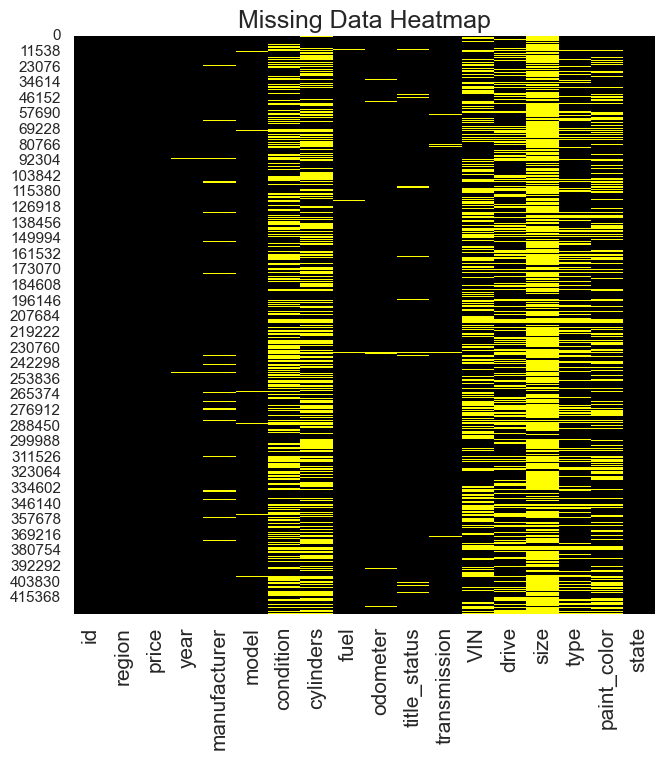

In [8]:
# Plot Missing Data
plt.figure(figsize = (7.5, 7.5))
plt.title('Missing Data Heatmap', fontsize = 18)
plt.xticks(fontsize = 15)
sns.heatmap(df.isnull(), cbar = False, cmap = 'gnuplot')
plt.show()

In [9]:
# Show columns with % missing data sorted by highest to lowest
df.isnull().sum().sort_values(ascending = False) / len(df) * 100

size            71.767476
cylinders       41.622470
condition       40.785232
VIN             37.725356
drive           30.586347
paint_color     30.501078
type            21.752717
manufacturer     4.133714
title_status     1.930753
model            1.236179
odometer         1.030735
fuel             0.705819
transmission     0.598763
year             0.282281
id               0.000000
region           0.000000
price            0.000000
state            0.000000
dtype: float64

#####  Data cleaning observations:

1. Drop the id column since it's redundant wrt to the index
2. Drop the VIN column since it does not correspond to any specific feature

#### Data cleaning:

In [10]:
# As I embark on data cleaning, I use the following function to keep track of how much data we are removing:
def rows_removed(new_data, org_data):
    print('Original # of rows: {:,}'.format(org_data.shape[0]))
    print('')
    print('    Total rows removed: {:,}'.format(org_data.shape[0] - new_data.shape[0]))
    print('    Total rows remaining: {:,}'.format(new_data.shape[0]))
    print('')
    print('    % rows removed: {:.0f}%'.format(round(100*(org_data.shape[0] - new_data.shape[0])/org_data.shape[0],2)))
    print('    % rows remaining: {:.0f}%'.format(round(100*(new_data.shape[0])/org_data.shape[0],2)))

In [11]:
rows_removed(df,df)

Original # of rows: 426,880

    Total rows removed: 0
    Total rows remaining: 426,880

    % rows removed: 0%
    % rows remaining: 100%


In [12]:
# Make a clean copy of the data
df_clean = df.copy()

In [13]:
df_clean.columns

Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN',
       'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')

In [14]:
# drop id and VIN columns from df_clean
df_clean.drop(['id', 'VIN'], axis = 1, inplace = True) 

In [15]:
# Find redundant values in different columns:
df_clean['type'].value_counts().sort_index()

SUV            77284
bus              517
convertible     7731
coupe          19204
hatchback      16598
mini-van        4825
offroad          609
other          22110
pickup         43510
sedan          87056
truck          35279
van             8548
wagon          10751
Name: type, dtype: int64

In [16]:
df_clean.columns

Index(['region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission',
       'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')

In [17]:
# Clean data by consoildating redundant values
df_clean.type.replace('pickup','truck',inplace=True)
df_clean.type.replace('van','mini-van',inplace=True)
df_clean.type.replace('rover','land rover',inplace=True)

In [18]:
df_clean['type'].value_counts().sort_index()

SUV            77284
bus              517
convertible     7731
coupe          19204
hatchback      16598
mini-van       13373
offroad          609
other          22110
sedan          87056
truck          78789
wagon          10751
Name: type, dtype: int64

In [19]:
# Find duplicate data ignoring the id column
df_clean[df_clean.duplicated(subset=df_clean.columns.difference(['id']))]

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
11,el paso,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tx
12,el paso,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tx
13,el paso,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tx
14,el paso,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tx
20,bellingham,24999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426849,wyoming,7877,2016.0,chevrolet,sonic,NaN,NaN,gas,108881.0,clean,automatic,NaN,NaN,sedan,silver,wy
426850,wyoming,13777,2013.0,bmw,x5,NaN,NaN,gas,104339.0,clean,automatic,NaN,NaN,SUV,silver,wy
426854,wyoming,7977,2009.0,toyota,matrix,NaN,NaN,gas,142868.0,clean,automatic,NaN,NaN,sedan,blue,wy
426856,wyoming,5477,2003.0,nissan,murano,NaN,NaN,gas,168055.0,clean,automatic,NaN,NaN,SUV,blue,wy


#####  There seems to be a lot of duplicate data.  However, I feel given the size of this data set they could still be valid.  I will not remove them at this time.

##### Check for linear relationship between various features

In [29]:
# check for coliinearity between columns
df_clean.corr(numeric_only = 'FALSE')

,price,year,odometer
price,1.000000,-0.004925,0.010032
year,-0.004925,1.000000,-0.157215
odometer,0.010032,-0.157215,1.000000


##### There is no apparent colinearity between numerical columns

In [30]:
# Find any record with missing year, price or odometer
df_clean[(df_clean['year'].isnull()) | (df_clean['price'].isnull()) | (df_clean['odometer'].isnull())]

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423127,milwaukee,4500,2011.0,buick,enclave,NaN,NaN,gas,NaN,clean,automatic,fwd,NaN,SUV,black,wi
423519,milwaukee,16990,NaN,NaN,HR-V,NaN,4 cylinders,gas,60424.0,NaN,manual,fwd,NaN,SUV,NaN,wi
423528,milwaukee,19995,NaN,NaN,Renegade,NaN,4 cylinders,gas,9217.0,NaN,automatic,4wd,NaN,SUV,NaN,wi
423934,milwaukee,0,NaN,NaN,nna,excellent,NaN,gas,0.0,clean,automatic,NaN,NaN,NaN,NaN,wi


In [31]:
# Drop any record with missing year, price or odometer
df_clean.dropna(subset=['year', 'price', 'odometer'], inplace=True)
rows_removed(df_clean,df)

Original # of rows: 426,880

    Total rows removed: 5,536
    Total rows remaining: 421,344

    % rows removed: 1%
    % rows remaining: 99%


In [32]:
# Drop any record with more than nine NA in a row
df_clean.dropna(thresh=9, inplace=True)
rows_removed(df_clean,df)

Original # of rows: 426,880

    Total rows removed: 5,667
    Total rows remaining: 421,213

    % rows removed: 1%
    % rows remaining: 99%


In [33]:
# Count number of records with type is missing
df_clean['type'].isnull().sum()

91651

In [34]:
#  List manufacturers and models where Type is missing and model and manufacturer are not missing sort count by manufacturer and model
df_clean[df_clean['type'].isnull() & df_clean['model'].notnull() & df_clean['manufacturer'].notnull()].groupby(['manufacturer','model']).size().sort_values(ascending=False)


manufacturer  model         
ford          f-150             1587
chevrolet     silverado 1500     997
ram           1500               894
chevrolet     silverado          798
nissan        altima             792
                                ... 
ford          sterling             1
              stepvan              1
              step van             1
              starcraft e350       1
volvo         xc90 t6 awd          1
Length: 8003, dtype: int64

In [35]:
# Set Type to truck for all records where manufacturer is toyota and model is rav4 and type is null
df_clean.loc[(df_clean['manufacturer'] == 'toyota') & (df_clean['model'] == 'rav4') & (df_clean['type'].isnull()), 'type'] = 'truck'
df_clean.loc[(df_clean['manufacturer'] == 'toyota') & (df_clean['model'] == 'tacoma') & (df_clean['type'].isnull()), 'type'] = 'truck'
df_clean.loc[(df_clean['manufacturer'] == 'toyota') & (df_clean['model'] == 'fj cruiser') & (df_clean['type'].isnull()), 'type'] = 'SUV'
df_clean.loc[(df_clean['manufacturer'] == 'toyota') & (df_clean['model'] == 'camry') & (df_clean['type'].isnull()), 'type'] = 'sedan'
df_clean.loc[(df_clean['manufacturer'] == 'honda') & (df_clean['model'] == 'accord') & (df_clean['type'].isnull()), 'type'] = 'sedan'
df_clean.loc[(df_clean['manufacturer'] == 'jeep') & (df_clean['model'] == 'cherokee') & (df_clean['type'].isnull()), 'type'] = 'SUV'
df_clean.loc[(df_clean['manufacturer'] == 'jeep') & (df_clean['model'] == 'wrangler') & (df_clean['type'].isnull()), 'type'] = 'SUV'
df_clean.loc[(df_clean['manufacturer'] == 'ford') & (df_clean['model'] == 'focus') & (df_clean['type'].isnull()), 'type'] = 'sedan'
df_clean.loc[(df_clean['manufacturer'] == 'ford') & (df_clean['model'] == 'f250 crew cab diesel') & (df_clean['type'].isnull()), 'type'] = 'truck'
df_clean.loc[(df_clean['manufacturer'] == 'ford') & (df_clean['model'] == 'windstar') & (df_clean['type'].isnull()), 'type'] = 'mini-van'
df_clean.loc[(df_clean['manufacturer'] == 'ford') & (df_clean['model'] == 'f-150') & (df_clean['type'].isnull()), 'type'] = 'truck'
df_clean.loc[(df_clean['manufacturer'] == 'ford') & (df_clean['model'] == 'escape') & (df_clean['type'].isnull()), 'type'] = 'SUV'
df_clean.loc[(df_clean['manufacturer'] == 'ford') & (df_clean['model'] == 'explorer') & (df_clean['type'].isnull()), 'type'] = 'SUV'
df_clean.loc[(df_clean['manufacturer'] == 'chevrolet') & (df_clean['model'] == 'silverado') & (df_clean['type'].isnull()), 'type'] = 'truck'
df_clean.loc[(df_clean['manufacturer'] == 'ram') & (df_clean['model'] == '1500') & (df_clean['type'].isnull()), 'type'] = 'truck'
df_clean.loc[(df_clean['manufacturer'] == 'nissan') & (df_clean['model'] == 'altima') & (df_clean['type'].isnull()), 'type'] = 'sedan'
df_clean.loc[(df_clean['manufacturer'] == 'nissan') & (df_clean['model'] == 'frontier') & (df_clean['type'].isnull()), 'type'] = 'truck'
df_clean.loc[(df_clean['manufacturer'] == 'acura') & (df_clean['model'] == '3.2 tl') & (df_clean['type'].isnull()), 'type'] = 'sedan'
df_clean.loc[(df_clean['manufacturer'] == 'acura') & (df_clean['model'] == 'cl') & (df_clean['type'].isnull()), 'type'] = 'sedan'
df_clean.loc[(df_clean['manufacturer'] == 'volvo') & (df_clean['model'].str.contains('xc')) & (df_clean['type'].isnull()), 'type'] = 'SUV'
df_clean.loc[(df_clean['manufacturer'] == 'volvo') & (df_clean['model'].str.contains('xc')) & (df_clean['type'].isnull()), 'type'] = 'SUV'
df_clean.loc[(df_clean['model'].str.contains('malibu')) & (df_clean['type'].isnull()), 'type'] = 'sedan'
df_clean.loc[(df_clean['model'].str.contains('civic')) & (df_clean['type'].isnull()), 'type'] = 'sedan'
df_clean.loc[(df_clean['model'].str.contains('2500')) & (df_clean['type'].isnull()), 'type'] = 'truck'
df_clean.loc[(df_clean['model'].str.contains('mustang')) & (df_clean['type'].isnull()), 'type'] = 'sedan'
df_clean.loc[(df_clean['model'].str.contains('tundra')) & (df_clean['type'].isnull()), 'type'] = 'truck'
df_clean.loc[(df_clean['model'].str.contains('corolla')) & (df_clean['type'].isnull()), 'type'] = 'sedan'
df_clean.loc[(df_clean['model'].str.contains('ranger')) & (df_clean['type'].isnull()), 'type'] = 'truck'
df_clean.loc[(df_clean['model'].str.contains('sierra')) & (df_clean['type'].isnull()), 'type'] = 'truck'
df_clean.loc[(df_clean['model'].str.contains('cruze')) & (df_clean['type'].isnull()), 'type'] = 'sedan'
df_clean.loc[(df_clean['model'].str.contains('f-350')) & (df_clean['type'].isnull()), 'type'] = 'truck'
df_clean.loc[(df_clean['model'].str.contains('f-250')) & (df_clean['type'].isnull()), 'type'] = 'truck'
df_clean.loc[(df_clean['model'].str.contains('f-450')) & (df_clean['type'].isnull()), 'type'] = 'truck'
df_clean.loc[(df_clean['model'].str.contains('f-550')) & (df_clean['type'].isnull()), 'type'] = 'truck'
df_clean.loc[(df_clean['model'].str.contains('f-650')) & (df_clean['type'].isnull()), 'type'] = 'truck'
df_clean.loc[(df_clean['model'].str.contains('f-750')) & (df_clean['type'].isnull()), 'type'] = 'truck'
df_clean.loc[(df_clean['model'].str.contains('f-850')) & (df_clean['type'].isnull()), 'type'] = 'truck'
df_clean.loc[(df_clean['model'].str.contains('f-950')) & (df_clean['type'].isnull()), 'type'] = 'truck'
df_clean.loc[(df_clean['model'].str.contains('f-150')) & (df_clean['type'].isnull()), 'type'] = 'truck'
df_clean.loc[(df_clean['model'].str.contains('grand caravan')) & (df_clean['type'].isnull()), 'type'] = 'mini-van'
df_clean.loc[(df_clean['model'].str.contains('grand cherokee')) & (df_clean['type'].isnull()), 'type'] = 'SUV'
df_clean.loc[(df_clean['model'].str.contains('cherokee')) & (df_clean['type'].isnull()), 'type'] = 'SUV'
df_clean.loc[(df_clean['model'].str.contains('wrangler')) & (df_clean['type'].isnull()), 'type'] = 'SUV'
df_clean.loc[(df_clean['model'].str.contains('durango')) & (df_clean['type'].isnull()), 'type'] = 'SUV'
df_clean.loc[(df_clean['model'].str.contains('journey')) & (df_clean['type'].isnull()), 'type'] = 'SUV'
df_clean.loc[(df_clean['model'].str.contains('challenger')) & (df_clean['type'].isnull()), 'type'] = 'coupe'
df_clean.loc[(df_clean['model'].str.contains('charger')) & (df_clean['type'].isnull()), 'type'] = 'sedan'
df_clean.loc[(df_clean['model'].str.contains('dart')) & (df_clean['type'].isnull()), 'type'] = 'sedan'
df_clean.loc[(df_clean['model'].str.contains('journey')) & (df_clean['type'].isnull()), 'type'] = 'SUV'
df_clean.loc[(df_clean['model'].str.contains('dakota')) & (df_clean['type'].isnull()), 'type'] = 'truck'
df_clean.loc[(df_clean['model'].str.contains('nitro')) & (df_clean['type'].isnull()), 'type'] = 'SUV'
df_clean.loc[(df_clean['model'].str.contains('avenger')) & (df_clean['type'].isnull()), 'type'] = 'sedan'
df_clean.loc[(df_clean['model'].str.contains('caliber')) & (df_clean['type'].isnull()), 'type'] = 'sedan'
df_clean.loc[(df_clean['model'].str.contains('ram')) & (df_clean['type'].isnull()), 'type'] = 'truck'
df_clean.loc[(df_clean['model'].str.contains('1500')) & (df_clean['type'].isnull()), 'type'] = 'truck'
df_clean.loc[(df_clean['model'].str.contains('2500')) & (df_clean['type'].isnull()), 'type'] = 'truck'
df_clean.loc[(df_clean['model'].str.contains('3500')) & (df_clean['type'].isnull()), 'type'] = 'truck'


In [36]:
# Set Type to truck for all records where manufacturer is toyota and model contains rav4 and type is null
df_clean.loc[(df_clean['manufacturer'] == 'toyota') & (df_clean['model'].str.contains('rav4')) & (df_clean['type'].isnull()), 'type'] = 'truck'

In [37]:
rows_removed(df_clean,df)

Original # of rows: 426,880

    Total rows removed: 5,667
    Total rows remaining: 421,213

    % rows removed: 1%
    % rows remaining: 99%


##### Now start checking for the distribution of each feature

C:\Users\ManishSonthalia\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


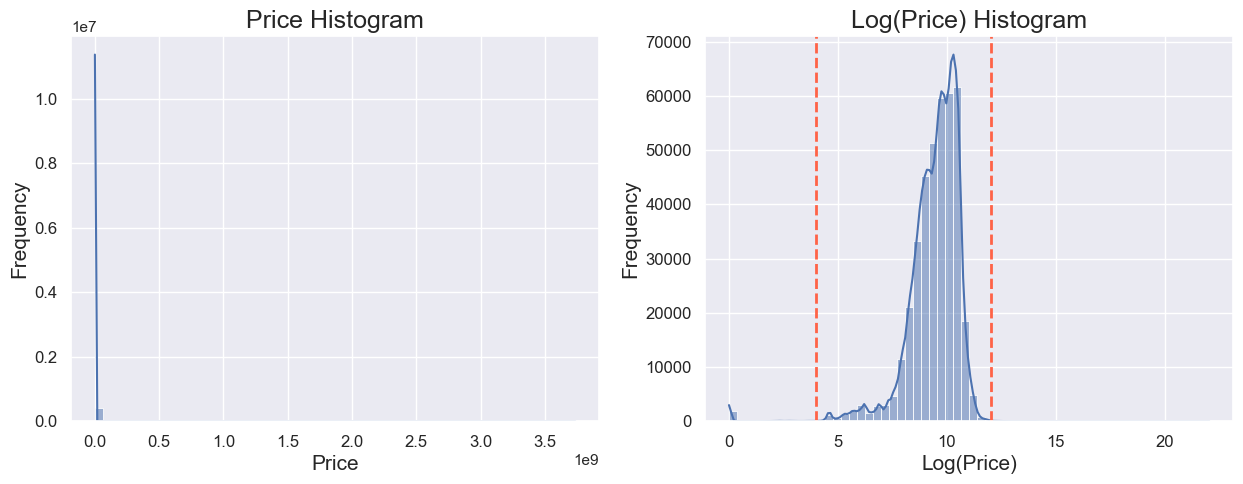

In [38]:
# plot histogram of price and log of price side by side
plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_clean['price'], bins = 60, kde = True)    
plt.title('Price Histogram', fontsize = 18)
plt.xlabel('Price', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.subplot(1, 2, 2)
sns.histplot(np.log(df_clean['price']), bins = 60, kde = True)
plt.title('Log(Price) Histogram', fontsize = 18)
plt.xlabel('Log(Price)', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.axvline(x = 4, ls = '--', lw = 2, color = 'tomato', label = '9.68')
plt.axvline(x = 12, ls = '--', lw = 2, color = 'tomato', label = '10.223');

##### <mark style="background-color: lightyellow">RuntimeWarning: divide by zero encountered in log result = getattr(ufunc, method)(*inputs, **kwargs)</mark> indicates the are records with zero price.  I will remove these records.

##### Remove outliers: Add column log_price. Only keep records with log(prices) between 4 and 12

In [40]:
df_clean = df_clean[(df_clean['price'] >= np.exp(4)) & (df_clean['price'] <= np.exp(12))]
df_clean['log_price'] = np.log(df_clean['price'])
rows_removed(df_clean,df)

Original # of rows: 426,880

    Total rows removed: 38,875
    Total rows remaining: 388,005

    % rows removed: 9%
    % rows remaining: 91%


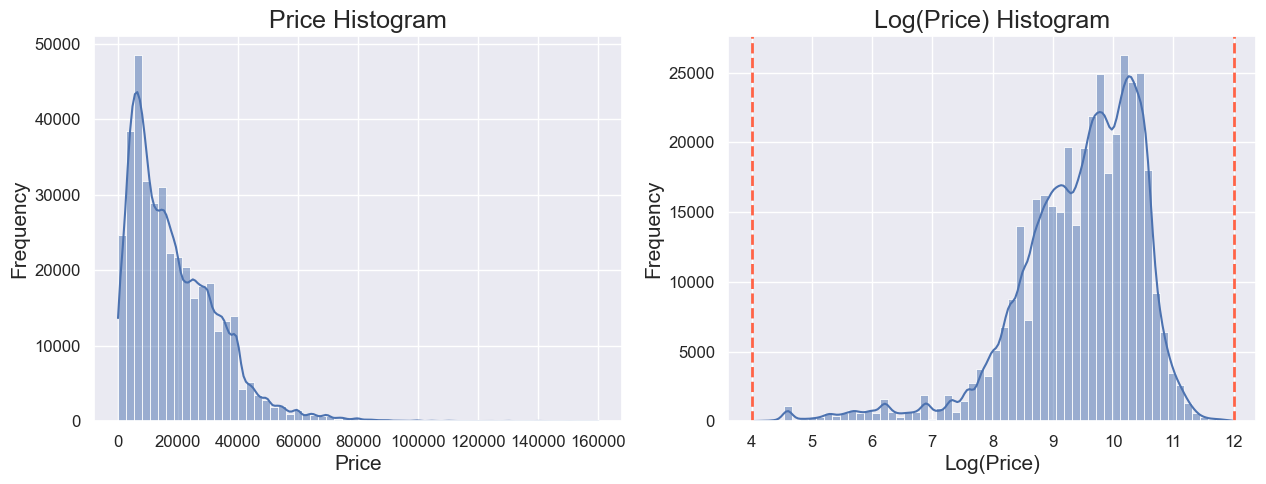

In [41]:
# plot histogram of price and log of price side by side
plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_clean['price'], bins = 60, kde = True)    
plt.title('Price Histogram', fontsize = 18)
plt.xlabel('Price', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.subplot(1, 2, 2)
sns.histplot(np.log(df_clean['price']), bins = 60, kde = True)
plt.title('Log(Price) Histogram', fontsize = 18)
plt.xlabel('Log(Price)', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.axvline(x = 4, ls = '--', lw = 2, color = 'tomato', label = '9.68')
plt.axvline(x = 12, ls = '--', lw = 2, color = 'tomato', label = '10.223');

#### Log (Price) is more like the normal distribution, we will ust Log (Price) for the modeling.  We now do the similar analysis on the Odometer and Year features.

C:\Users\ManishSonthalia\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


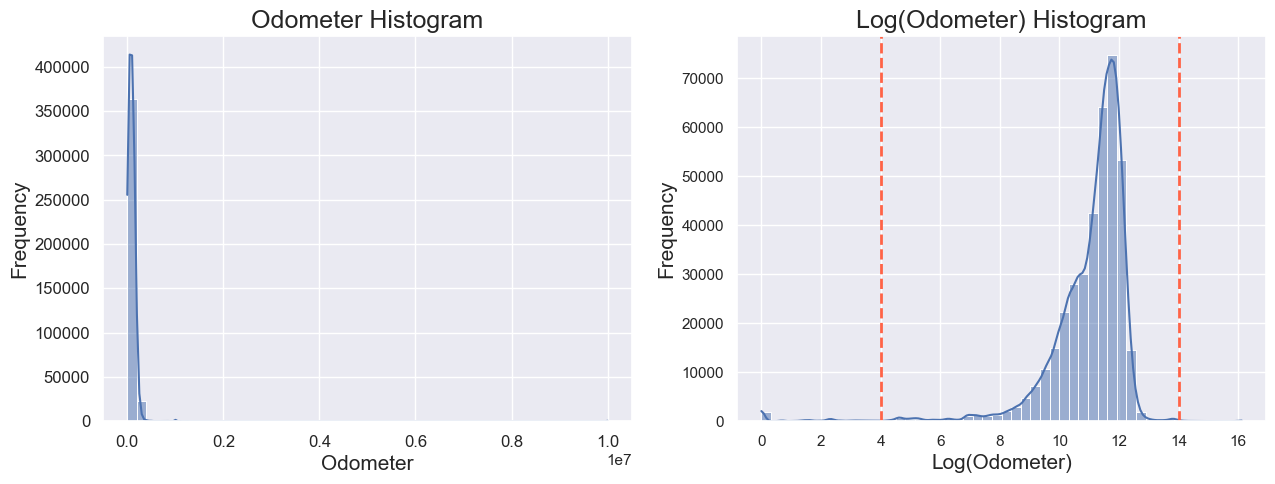

In [43]:
# Plot histogram of odometer and log of odometer side by side
plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_clean['odometer'], bins = 50, kde = True)
plt.title('Odometer Histogram', fontsize = 18)
plt.xlabel('Odometer', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.subplot(1, 2, 2)
sns.histplot(np.log(df_clean['odometer']), bins = 50, kde = True)
plt.title('Log(Odometer) Histogram', fontsize = 18)
plt.xlabel('Log(Odometer)', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.axvline(x = 4, ls = '--', lw = 2, color = 'tomato', label = '9.68')
plt.axvline(x = 14, ls = '--', lw = 2, color = 'tomato', label = '10.223');

##### Remove outliers: Add column log_odometer. Only keep records with log(odometer) between 4 and 14

In [44]:
df_clean = df_clean[(df_clean['odometer'] >= np.exp(4)) & (df_clean['odometer'] <= np.exp(14))]
df_clean['log_odometer'] = np.log(df_clean['odometer'])
rows_removed(df_clean,df)

Original # of rows: 426,880

    Total rows removed: 43,654
    Total rows remaining: 383,226

    % rows removed: 10%
    % rows remaining: 90%


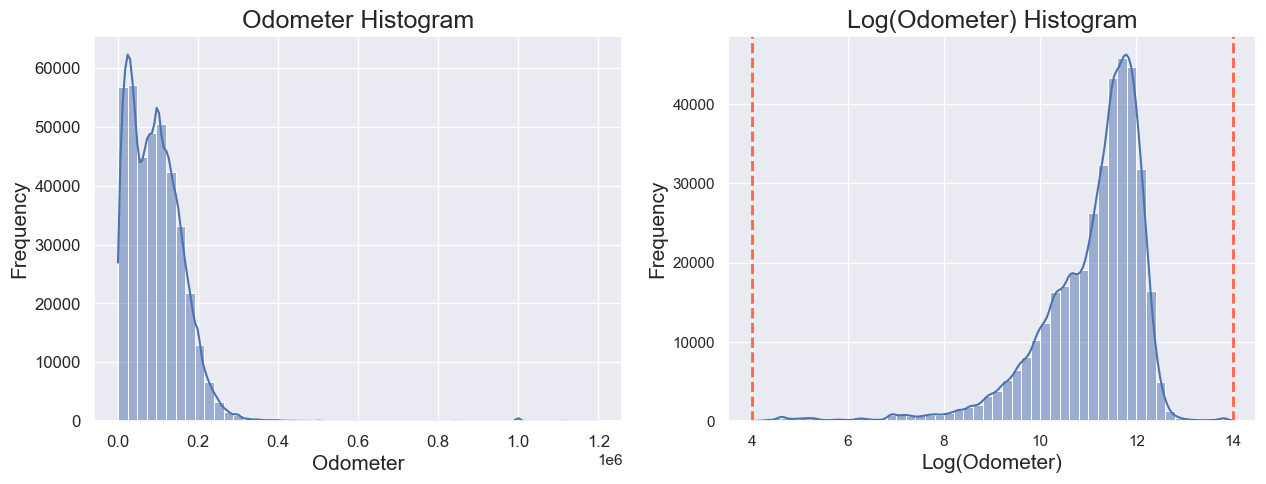

In [45]:
# Plot histogram of odometer and log of odometer side by side
plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_clean['odometer'], bins = 50, kde = True)
plt.title('Odometer Histogram', fontsize = 18)
plt.xlabel('Odometer', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.subplot(1, 2, 2)
sns.histplot(np.log(df_clean['odometer']), bins = 50, kde = True)
plt.title('Log(Odometer) Histogram', fontsize = 18)
plt.xlabel('Log(Odometer)', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.axvline(x = 4, ls = '--', lw = 2, color = 'tomato', label = '9.68')
plt.axvline(x = 14, ls = '--', lw = 2, color = 'tomato', label = '10.223');

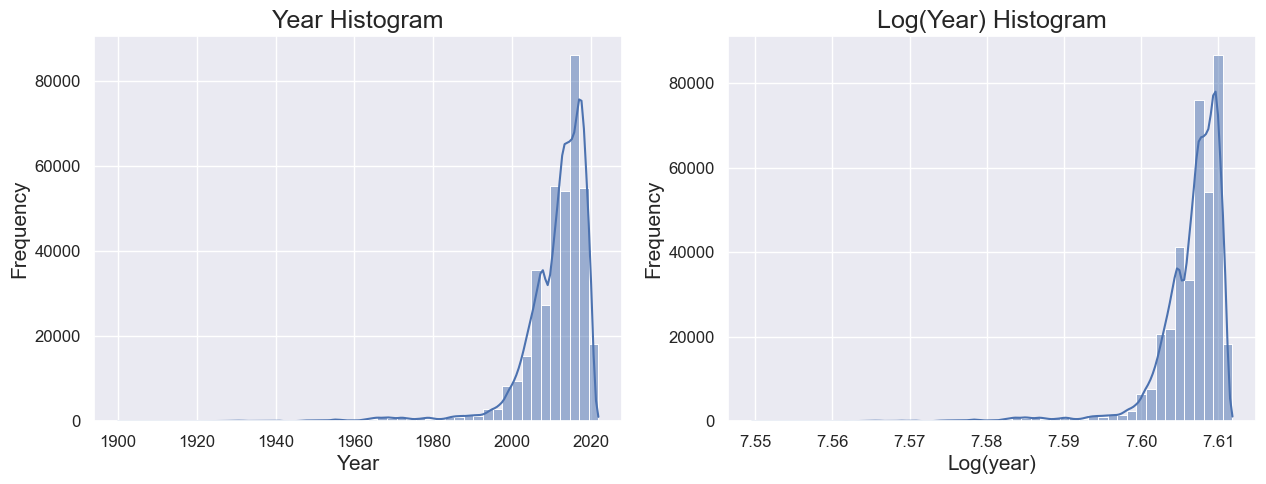

In [47]:
# Plot histogram of year and log of year side by side
plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_clean['year'], bins = 50, kde = True)
plt.title('Year Histogram', fontsize = 18)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.subplot(1, 2, 2)
sns.histplot(np.log(df_clean['year']), bins = 50, kde = True)
plt.title('Log(Year) Histogram', fontsize = 18)
plt.xlabel('Log(year)', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12);

##### Year values look similar in log and non-log form, so we will keep the non-log form.

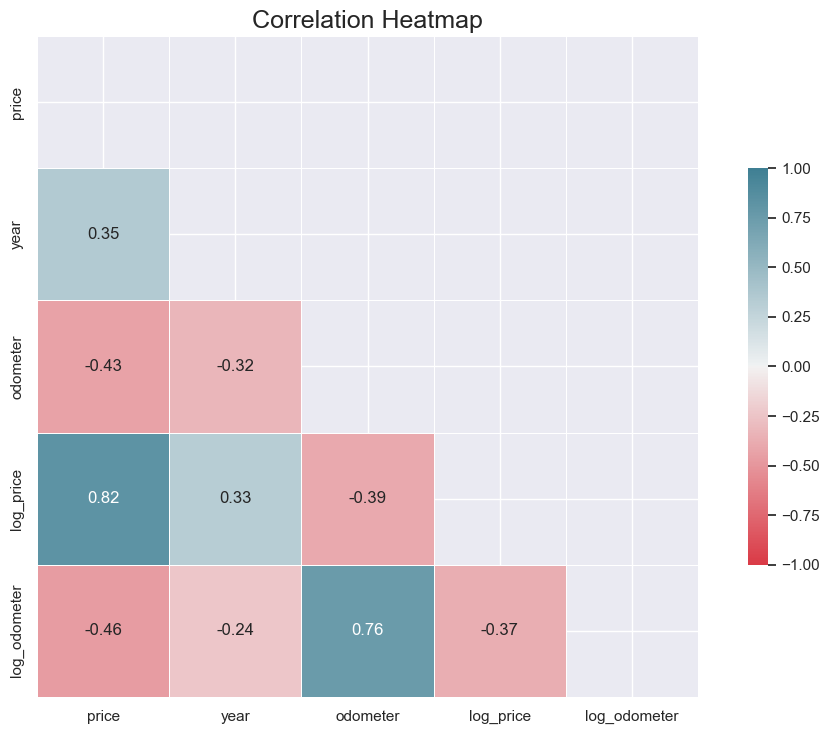

In [50]:
# Plot heatmap of correlations
plt.figure(figsize = (10.5,7.5), tight_layout = True)
plt.title('Correlation Heatmap', fontsize = 18)
# corr = df_clean[['price','log_price','odometer','log_odo','year','log_year']].corr()
corr = df_clean.corr(numeric_only='FALSE')
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(10, 220, as_cmap=True)

sns.heatmap(corr, 
            cmap = cmap, 
            mask = mask, 
            center = 0, 
            vmax = 1, 
            vmin = -1, 
            square = True, 
            linewidths = 0.5, 
            cbar_kws={"shrink": 0.6},
            annot = True,
)
plt.show();

##### The heat map shows stronger correlations between price and log_price, odometer and log_odometer, and year and log_year.

#### Remove the remaining outliers ####

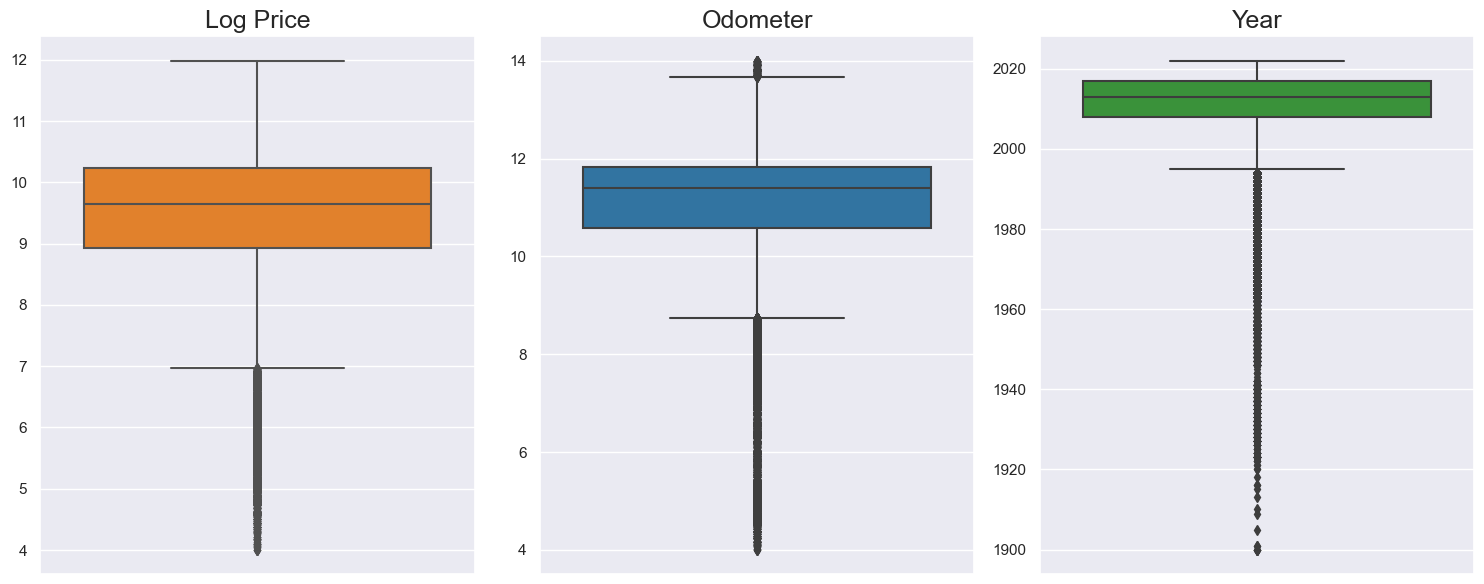

In [57]:
# Plot boxplots of log price, log odometer, and year to find outliers
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, tight_layout = True, figsize = (15, 6))
sns.boxplot(y = df_clean.log_price, ax = ax1, color = 'tab:orange')
ax1.set_title('Log Price', fontsize = 18)
ax1.set_ylabel(None)
sns.boxplot(y = df_clean.log_odometer, ax = ax2, color = 'tab:blue')
ax2.set_title('Odometer', fontsize = 18)
ax2.set_ylabel(None)
sns.boxplot(y = df_clean.year, ax = ax3, color = 'tab:green')
ax3.set_title('Year', fontsize = 18)
ax3.set_ylabel(None);

In [58]:
# Find data outside of 1.5 IQR
df_iqr = df_clean[['log_price','log_odometer','year']]
q3, q1 = df_iqr.quantile(0.75), df_iqr.quantile(0.25), 
iqr = q3-q1
maxm, minm = q3 + 1.5*iqr, q1 - 1.5*iqr 

print(((df_iqr < minm) | (df_iqr > (maxm))).sum())

log_price       11461
log_odometer    13954
year            14468
dtype: int64


#### I will remove 11461 log_price, 13954 log_odometer and 14468 year outlier records

In [59]:
# Remove data outside of 1.5 IQR
df_clean = df_clean[(df_clean['log_price'] >= minm[0]) & (df_clean['log_price'] <= maxm[0])]
df_clean = df_clean[(df_clean['log_odometer'] >= minm[1]) & (df_clean['log_odometer'] <= maxm[1])]
df_clean = df_clean[(df_clean['year'] >= minm[2]) & (df_clean['year'] <= maxm[2])]
rows_removed(df_clean,df)

Original # of rows: 426,880

    Total rows removed: 81,088
    Total rows remaining: 345,792

    % rows removed: 19%
    % rows remaining: 81%


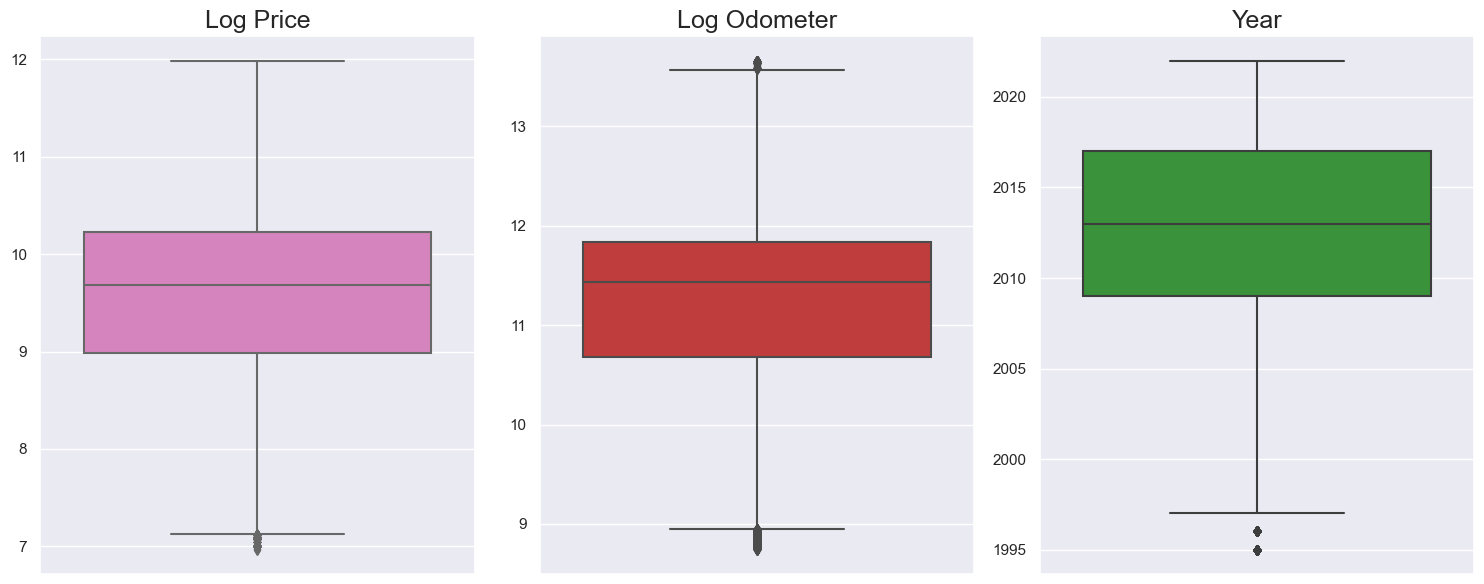

In [62]:
# Plot cleaned data
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, tight_layout = True, figsize = (15, 6))
sns.boxplot(y = df_clean.log_price, ax = ax1, color = 'tab:pink')
ax1.set_title('Log Price', fontsize = 18)
ax1.set_ylabel(None)
sns.boxplot(y = df_clean.log_odometer, ax = ax2, color = 'tab:red')
ax2.set_title('Log Odometer', fontsize = 18)
ax2.set_ylabel(None)
sns.boxplot(y = df_clean.year, ax = ax3, color = 'tab:green')
ax3.set_title('Year', fontsize = 18)
ax3.set_ylabel(None);

In [63]:
df_clean.columns

Index(['region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission',
       'drive', 'size', 'type', 'paint_color', 'state', 'log_price',
       'log_odometer'],
      dtype='object')

### Missing Value Imputation

##### I impude missing values in df_clean for large missing data:  condition, cylinders, drive, size, paint_color.
##### Since the we expect car type to impact the imputation, I will use the median value for each vehicle type to impute the missing values.

In [65]:
df_clean['condition'] = df_clean.groupby('type')['condition'].transform(lambda x: x.fillna(x.mode()[0]))
df_clean['cylinders'] = df_clean.groupby('type')['cylinders'].transform(lambda x: x.fillna(x.mode()[0]))
df_clean['drive'] = df_clean.groupby('type')['drive'].transform(lambda x: x.fillna(x.mode()[0]))
df_clean['size'] = df_clean.groupby('type')['size'].transform(lambda x: x.fillna(x.mode()[0]))
df_clean['paint_color'] = df_clean.groupby('type')['paint_color'].transform(lambda x: x.fillna(x.mode()[0]))

In [66]:
df_clean.isnull().sum()

region              0
price               0
year                0
manufacturer    10419
model            2856
condition       46940
cylinders       46940
fuel             1896
odometer            0
title_status     5506
transmission     1344
drive           46940
size            46940
type            46940
paint_color     46940
state               0
log_price           0
log_odometer        0
dtype: int64

### Remove remaining missing values

In [68]:
df_clean.dropna(inplace = True)
rows_removed(df_clean,df)

Original # of rows: 426,880

    Total rows removed: 144,901
    Total rows remaining: 281,979

    % rows removed: 34%
    % rows remaining: 66%


#### Data is now cleaned and ready for EDA and modeling.  We still have 61% of date remaining ####

<mark style="background-color: lightyellow">If I had more time, I would have tried to I dentify the missing Type values for as much as possible before proceeding to modeling.</mark>

## Modeling

1. Remove redunindant features: price, odometer, and model (too many inconsistent values)
2. Standarize data (Feature scaling)
3. Encode categorical feature
4. Splitt data into train and test
5. Fit model

### Performance metrics

1. Man Absolute Error (MAE): A small MAE means our model has good predictions (0 mean perfict prediction) and a large value indicates large outliers
2. Mean Absolute Eercentage Error (MAPE):  Shows the prediction accuracy.  A 0 values means 100% accurcy and 0.5 means only 50% accuracy

#### Baseline Model:  We first create a baseline model with simple regression  

#### Baseline Model:  We first create a baseline model without doing all the steps to check for worst scores.  

1. Linear Regression
2. Polyniomal Regression
3. GridSearchCV with Linear Regression

In [69]:
# Make a copy of the cleaned data
df_clean_lr = df_clean.copy()
df_clean_lr.drop(['price','odometer','model','region'], axis = 1, inplace = True)

In [70]:
# Encode categorical variables
df_clean_lr = pd.get_dummies(df_clean_lr, drop_first = True)

In [71]:
df_clean_lr.shape

(281979, 141)

In [72]:
scaler = StandardScaler()
x = df_clean_lr[['log_odometer','year']]
scaler.fit(x)
x_scaled = scaler.transform(x)

df_scaled = df_clean_lr.copy()
df_scaled[['log_odometer','year']] = x_scaled
df_scaled[['log_odometer','year']].describe()

,log_odometer,year
count,2.819790e+05,2.819790e+05
mean,-7.507115e-16,-9.066193e-15
std,1.000002e+00,1.000002e+00
min,-2.889053e+00,-3.308006e+00
25%,-6.673508e-01,-6.843453e-01
50%,2.520090e-01,2.526764e-01
75%,7.701858e-01,8.148895e-01
max,2.979915e+00,1.751911e+00


In [73]:
rows_removed(df_clean_lr,df)

Original # of rows: 426,880

    Total rows removed: 144,901
    Total rows remaining: 281,979

    % rows removed: 34%
    % rows remaining: 66%


In [74]:
#### Cross validation #####
# Split data into train and test sets
X = df_clean_lr.drop('log_price', axis = 1)
y = df_clean_lr['log_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

#### Simple Linear regression model without any of the alpha parameter optimization #####

In [75]:
# build lineara regression model
lr = LinearRegression().fit(X_train, y_train)

# predict on test set
y_preds = lr.predict(X_test)

train_preds = lr.predict(X_train)
test_preds = lr.predict(X_test)
train_mae =  mean_absolute_error(y_train, train_preds)
test_mae =  mean_absolute_error(y_test, test_preds)
train_mape = mean_absolute_percentage_error(y_train, train_preds)
test_mape = mean_absolute_percentage_error(y_test, test_preds)
rmse = np.sqrt(mean_squared_error(y_test, y_preds))

# show Train and Test MAE and MAPE value in a table
results = pd.DataFrame({'Model': ['Linear Regression'],
                        'Best Score': [lr.score(X_test, y_test)],
                        'Train MAE': [train_mae],
                        'Test MAE': [test_mae],
                        'Train MAPE': [train_mape],
                        'Test MAPE': [test_mape],
                        'RMSE': [rmse]})
results

,Model,Best Score,Train MAE,Test MAE,Train MAPE,Test MAPE,RMSE
0,Linear Regression,0.795081,0.261646,0.261626,0.027896,0.027915,0.362544


#### Ridge regression model with optimization of the alpha parameter

In [76]:
# Build a ridge regression model and optimize the alpha parameter
# Create a list of alphas to try
# np.linspace(0.1, 100, 10)
params = {'alpha': [0, 0.1, 0.5, 1.0, 5, 10, 50, 100]}
# Instantiate the ridge regressor: ridge
ridge = Ridge()
ridge_cv = GridSearchCV(ridge, params, cv = 5)
ridge_cv.fit(X_train, y_train)
# Print the tuned parameters and score
print("Tuned Ridge Regression Parameters: {}".format(ridge_cv.best_params_))

y_preds = ridge_cv.predict(X_test)
train_preds = ridge_cv.predict(X_train)
test_preds = ridge_cv.predict(X_test)
train_mae =  mean_absolute_error(y_train, train_preds)
test_mae =  mean_absolute_error(y_test, test_preds)
train_mape = mean_absolute_percentage_error(y_train, train_preds)
test_mape = mean_absolute_percentage_error(y_test, test_preds)
rmse = np.sqrt(mean_squared_error(y_test, y_preds))

# show Train and Test MAE and MAPE value in a table
results = pd.DataFrame({'Model': ['Ridge Regression'],
                        'Best Score': [ridge_cv.best_score_],
                        'Train MAE': [train_mae],
                        'Test MAE': [test_mae],
                        'Train MAPE': [train_mape],
                        'Test MAPE': [test_mape],
                        'RMSE': [rmse]})
results

Tuned Ridge Regression Parameters: {'alpha': 1.0}


,Model,Best Score,Train MAE,Test MAE,Train MAPE,Test MAPE,RMSE
0,Ridge Regression,0.794543,0.261653,0.261634,0.027897,0.027916,0.362522


#### Lasso regression model with polynomial feature for year

In [77]:
warnings.filterwarnings('ignore')
ct = ColumnTransformer(transformers=[('poly', PolynomialFeatures(include_bias=False), ['year'])], remainder='passthrough')
pipe = Pipeline([('ct', ct), ('lasso', Lasso(random_state=42))])

param_grid = {'ct__poly__degree': [1, 2, 3],
              'lasso__alpha': [0.1, 1, 10]}

grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)

y_preds = ridge_cv.predict(X_test)
train_preds = ridge_cv.predict(X_train)
test_preds = ridge_cv.predict(X_test)
train_mae =  mean_absolute_error(y_train, train_preds)
test_mae =  mean_absolute_error(y_test, test_preds)
train_mape = mean_absolute_percentage_error(y_train, train_preds)
test_mape = mean_absolute_percentage_error(y_test, test_preds)
rmse = np.sqrt(mean_squared_error(y_test, y_preds))

print(f'Best parameters: {grid.best_params_}')
print(f'Best score: {grid.best_score_}')

# show Train and Test MAE and MAPE value in a table
results = pd.DataFrame({'Model': ['Lasso with Polynomial Features'],
                        'Best Score': grid.best_score_,
                        'Train MAE': [train_mae],
                        'Test MAE': [test_mae],
                        'Train MAPE': [train_mape],
                        'Test MAPE': [test_mape],
                        'RMSE': [rmse]})
results


Best parameters: {'ct__poly__degree': 1, 'lasso__alpha': 0.1}
Best score: 0.5596410748626559


,Model,Best Score,Train MAE,Test MAE,Train MAPE,Test MAPE,RMSE
0,Lasso with Polynomial Features,0.559641,0.261653,0.261634,0.027897,0.027916,0.362522


### Evaluation

##### <mark style="background-color: lightyellow">Simple Regression provides the best model.</mark>. Both MAPE and RMSE are low, indicating that the model is a good fit.

##### Plot Training Predictions

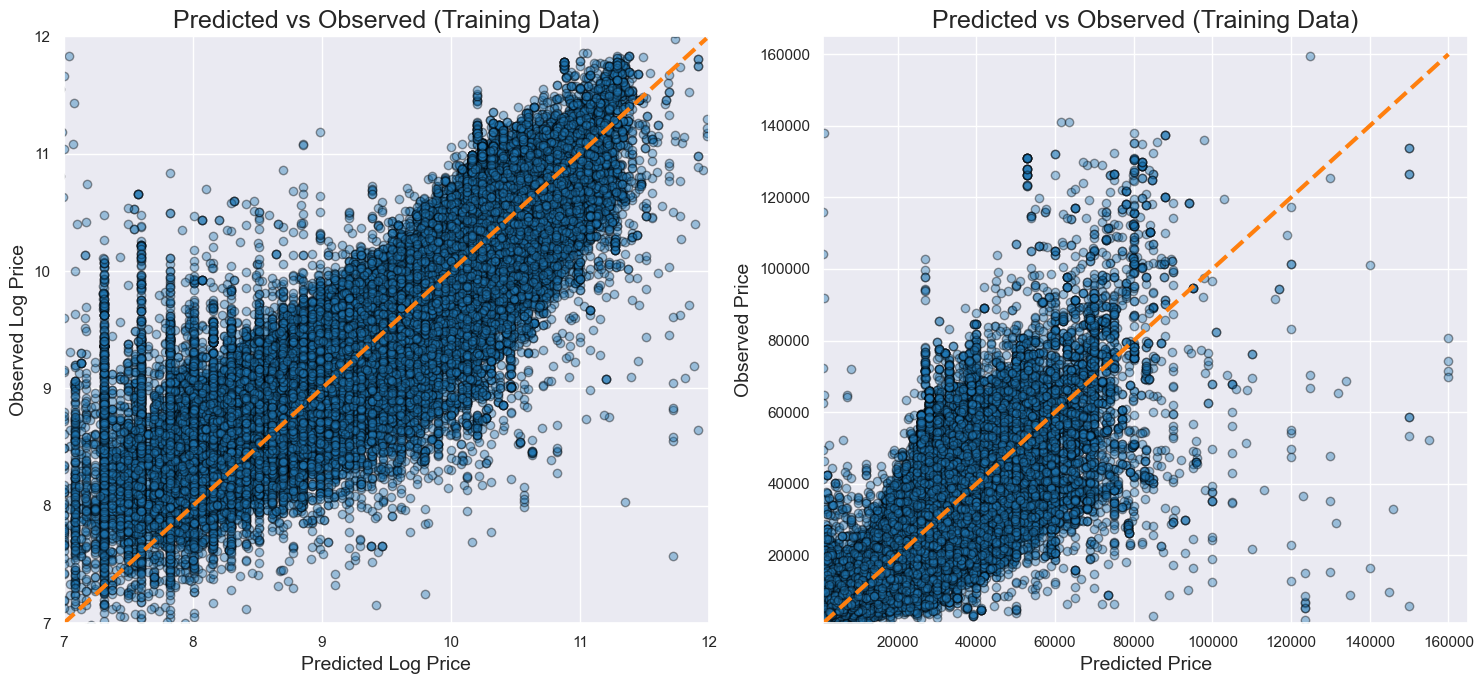

In [78]:
# plot Actual vs Training for Trainin Data
y_hat_train = lr.predict(X_train)
plt.figure(figsize = (15, 7), tight_layout = True)
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_hat_train, alpha = 0.4, color = 'tab:blue', edgecolors = (0, 0, 0))

plt.xlabel('Predicted Log Price', fontsize = 14)
plt.ylabel('Observed Log Price', fontsize = 14)
plt.title('Predicted vs Observed (Training Data)', fontsize = 18)
plt.grid(True)
plt.xlim(7, 12)
plt.ylim(7, 12)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'tab:orange', lw = 3, ls = '--')

plt.subplot(1, 2, 2)
plt.scatter(np.exp(y_train), np.exp(y_hat_train), alpha = 0.4, color = 'tab:blue', edgecolors = (0, 0, 0))
plt.xlabel('Predicted Price', fontsize = 14)
plt.ylabel('Observed Price', fontsize = 14)
plt.title('Predicted vs Observed (Training Data)', fontsize = 18)
plt.grid(True)
plt.xlim(1000, 165000)
plt.ylim(1000, 165000)
plt.plot([np.exp(y_train).min(), np.exp(y_train).max()], [np.exp(y_train).min(), np.exp(y_train).max()], color = 'tab:orange', lw = 3, ls = '--');

##### Plot Testing Predictions

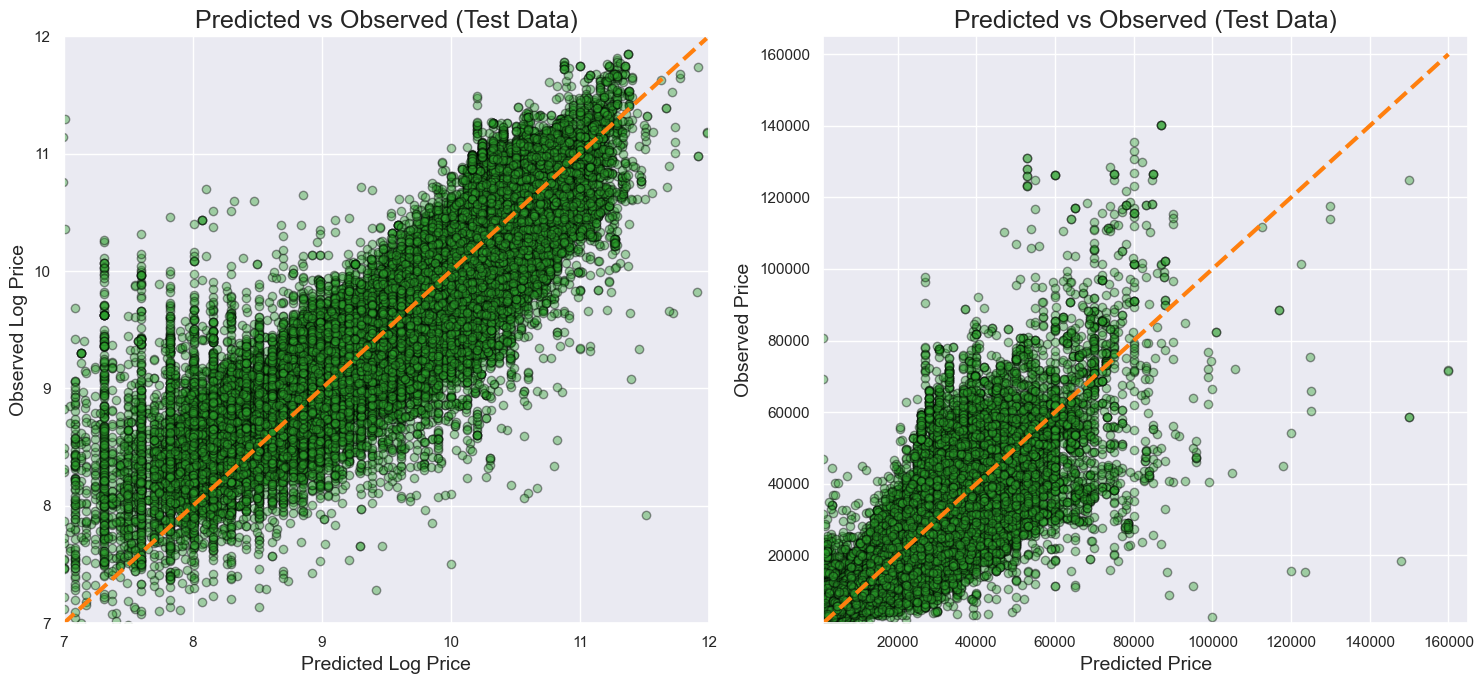

In [81]:
# plot training vs test for linear regression
plt.figure(figsize = (15, 7), tight_layout = True)
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_preds, alpha = 0.4, color = 'tab:green', edgecolors = (0, 0, 0))

plt.xlabel('Predicted Log Price', fontsize = 14)
plt.ylabel('Observed Log Price', fontsize = 14)
plt.title('Predicted vs Observed (Test Data)', fontsize = 18)
plt.grid(True)
plt.xlim(7, 12)
plt.ylim(7, 12)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'tab:orange', lw = 3, ls = '--')

plt.subplot(1, 2, 2)
y_test_price = np.exp(y_test)
y_pred_price = np.exp(y_preds)
plt.scatter(y_test_price, y_pred_price, alpha = 0.4, color = 'tab:green', edgecolors = (0, 0, 0))
plt.xlabel('Predicted Price', fontsize = 14)
plt.ylabel('Observed Price', fontsize = 14)
plt.title('Predicted vs Observed (Test Data)', fontsize = 18)
plt.grid(True)
plt.xlim(1000, 165000)
plt.ylim(1000, 165000)
plt.plot([y_test_price.min(), y_test_price.max()], [y_test_price.min(), y_test_price.max()], color = 'tab:orange', lw = 3, ls = '--');

In [82]:
y_hat_train = lr.predict(X_train)
eval_df = pd.DataFrame({'Predicted': y_hat_train, 
                        'Observed': y_train, 
                        'Residual': y_hat_train - y_train, 
                        'Abs. Error': np.abs(y_hat_train - y_train)})
print ('Training Data Evaluation Metrics')
eval_df.describe()

Training Data Evaluation Metrics


,Predicted,Observed,Residual,Abs. Error
count,197385.000000,197385.000000,1.973850e+05,197385.000000
mean,9.626219,9.626219,1.904712e-15,0.261646
std,0.713202,0.799876,3.621382e-01,0.250370
min,6.230978,6.967909,-4.147582e+00,0.000017
25%,9.112481,9.081142,-2.052169e-01,0.092669
50%,9.646931,9.740380,-1.570257e-02,0.198317
75%,10.156210,10.260812,1.897301e-01,0.354953
max,12.598419,11.982873,4.793430e+00,4.793430


In [83]:
y_hat = lr.predict(X_test)
eval_df = pd.DataFrame({'Predicted': y_hat, 
                        'Observed': y_test, 
                        'Residual': y_hat - y_test, 
                        'Abs. Error': np.abs(y_hat - y_test)})
print ('Testing Data Evaluation Metrics')
eval_df.describe()

Testing Data Evaluation Metrics


,Predicted,Observed,Residual,Abs. Error
count,84594.000000,84594.000000,84594.000000,84594.000000
mean,9.627589,9.627879,-0.000290,0.261626
std,0.713265,0.800890,0.362546,0.250981
min,6.759947,6.993015,-3.591408,0.000004
25%,9.118506,9.082393,-0.205063,0.091807
50%,9.647633,9.740674,-0.016997,0.197363
75%,10.157494,10.260812,0.188348,0.354847
max,12.843146,11.982873,5.225386,5.225386


#### Summary of the Test

In summary, our model performs similary on test and training data. There doesn't seem to be a major drop in performance based on the metrics we calculated (R-squared, Adj. R-squared, MAE, and RMSE).

#### Residual Analysis

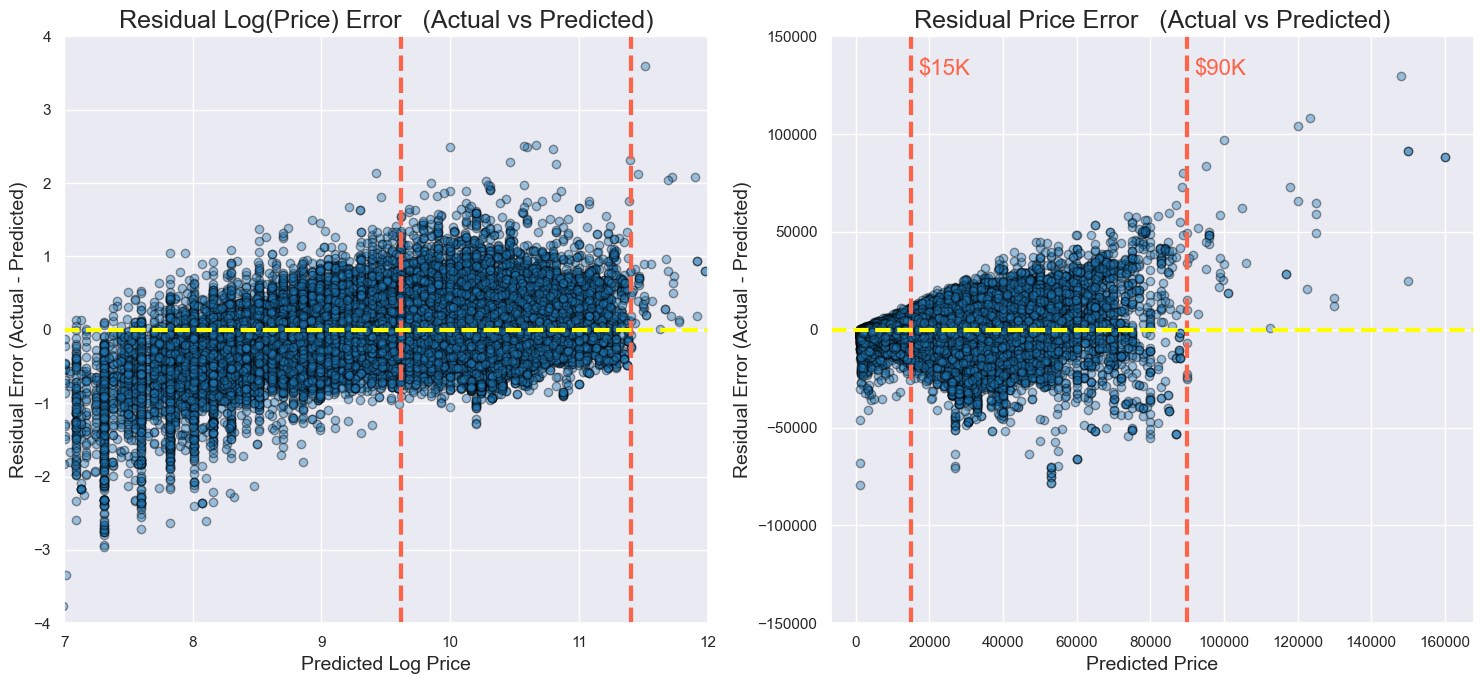

In [84]:
# plot residuals
plt.figure(figsize = (15, 7), tight_layout = True)
plt.subplot(1, 2, 1)
plt.scatter(y_test, (y_test - y_preds), alpha = 0.4, color = 'tab:blue', edgecolors = (0, 0, 0))
plt.xlabel('Predicted Log Price', fontsize = 14)
plt.ylabel('Residual Error (Actual - Predicted)', fontsize = 14)
plt.title('Residual Log(Price) Error   (Actual vs Predicted)', fontsize = 18)
plt.axvline(x = np.log(15000), ls = '--', lw = 3, color = 'tomato')
plt.axvline(x = np.log(90000), ls = '--', lw = 3, color = 'tomato')
plt.ylim(-4, 4)
plt.axhline(y = 0, ls = '--', lw = 3, color = 'yellow', label = 'Zero')
plt.grid(True)
plt.xlim(7, 12)

plt.subplot(1, 2, 2)
y_test_price = np.exp(y_test)
y_pred_price = np.exp(y_preds)
plt.scatter(y_test_price, (y_test_price - y_pred_price), alpha = 0.4, color = 'tab:blue', edgecolors = (0, 0, 0))
plt.xlabel('Predicted Price', fontsize = 14)
plt.ylabel('Residual Error (Actual - Predicted)', fontsize = 14)
plt.title('Residual Price Error   (Actual vs Predicted)', fontsize = 18)
plt.grid(True)
plt.axvline(x = 15000, ls = '--', lw = 3, color = 'tomato', label = '9.68')
plt.axvline(x = 90000, ls = '--', lw = 3, color = 'tomato', label = '10.223')
plt.axhline(y = 0, ls = '--', lw = 3, color = 'yellow', label = 'Zero')
plt.ylim(-150000, 150000)
plt.text(17000, 130000, '$15K', fontsize = 16, color = 'tomato')
plt.text(92000, 130000, '$90K', fontsize = 16, color = 'tomato');

### Looking at the residual plot:
1. The residual points tend to be negative below $15K (logPrice  < 9.6), resulting in over-predictions in this range

2. Some of the over-predictions in the lows price range are quite large

3. The residual points tend to be positive after $90K (logPrice  > 11.4), resulting in under-predictions above $90K

4. <mark style="background-color: lightyellow">The Linear Regression model performs well in the middle price range where Price is between $15K and $90K</mark>

## Analysis of the model

In [85]:
# Rank features by coefficient
coef = pd.DataFrame(lr.coef_, index = X_train.columns, columns = ['Coefficient']).sort_values('Coefficient', ascending = False)

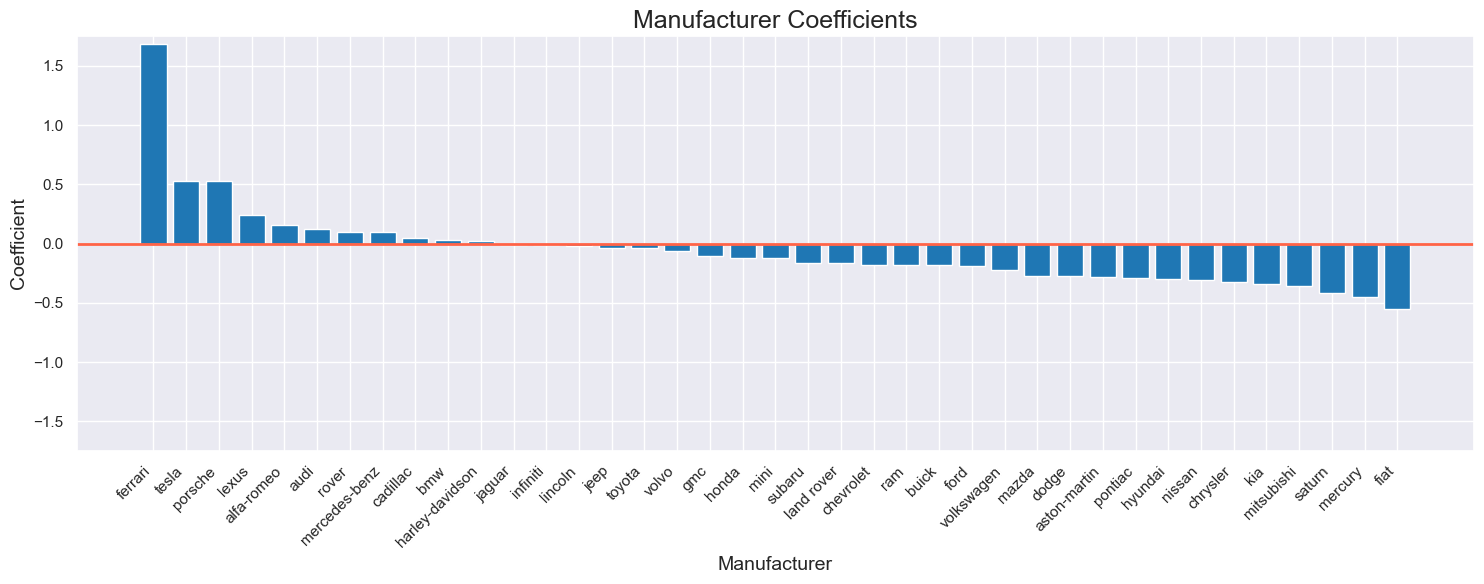

In [86]:
# Show only manufacturer coefficients:
mc = coef[coef.index.str.contains('manufacturer')].sort_values(by = 'Coefficient', ascending = False)
# remove the prefix manufacturer_ from mc index
mc.index = mc.index.str.replace('manufacturer_','')
plt.figure(figsize = (15, 6), tight_layout = True)
plt.bar(mc.index, mc.Coefficient, color = 'tab:blue')  
# limit y axis to 0 to 0.5
plt.ylim(-1.75, 1.75)
plt.xticks(rotation = 90)
plt.xlabel('Manufacturer', fontsize = 14)
plt.ylabel('Coefficient', fontsize = 14)
plt.title('Manufacturer Coefficients', fontsize = 18)
plt.xticks(rotation = 45, ha = 'right')
plt.axhline(y = 0, lw = 2, color = 'tomato')
plt.grid(True);

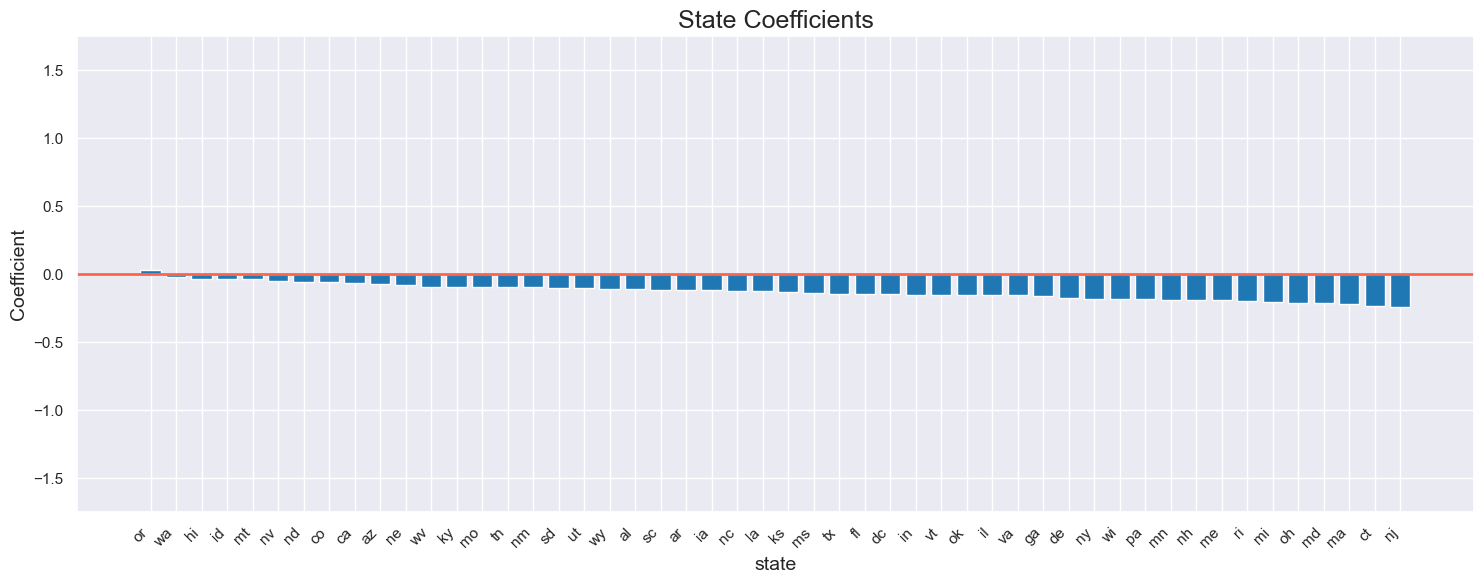

In [87]:
# Show only state coefficients:
mc = coef[coef.index.str.contains('state')].sort_values(by = 'Coefficient', ascending = False)
# remove the prefix manufacturer_ from mc index
mc.index = mc.index.str.replace('state_','')
plt.figure(figsize = (15, 6), tight_layout = True)
plt.bar(mc.index, mc.Coefficient, color = 'tab:blue')  
plt.ylim(-1.75, 1.75)
plt.xticks(rotation = 90)
plt.xlabel('state', fontsize = 14)
plt.ylabel('Coefficient', fontsize = 14)
plt.title('State Coefficients', fontsize = 18)
plt.xticks(rotation = 45, ha = 'right')
plt.axhline(y = 0, lw = 2, color = 'tomato')
plt.grid(True);

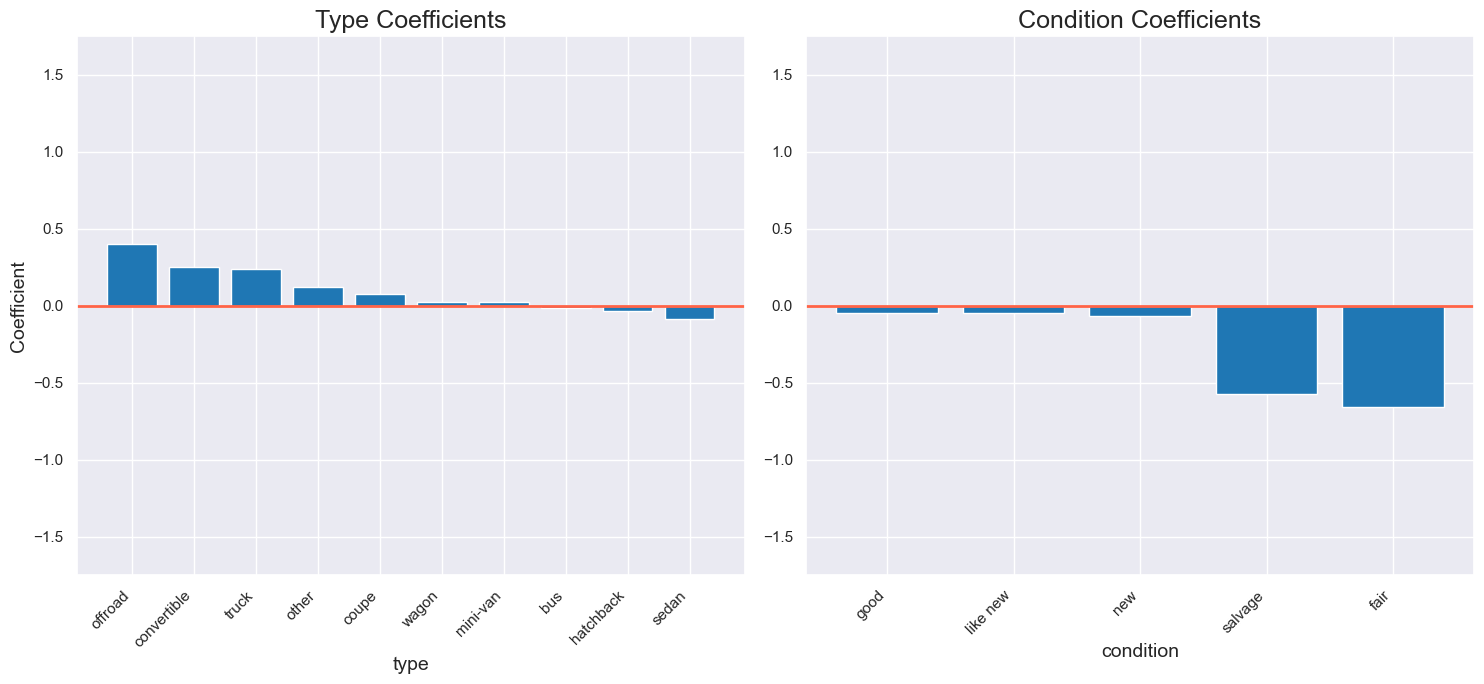

In [88]:
# Show only title_status coefficients:
mc = coef[coef.index.str.contains('type')].sort_values(by = 'Coefficient', ascending = False)
# remove the prefix manufacturer_ from mc index
mc.index = mc.index.str.replace('type_','')
plt.figure(figsize = (15, 7), tight_layout = True)
plt.subplot(1, 2, 1)
plt.bar(mc.index, mc.Coefficient, color = 'tab:blue')  
plt.ylim(-1.75, 1.75)
plt.xticks(rotation = 90)
plt.xlabel('type', fontsize = 14)
plt.ylabel('Coefficient', fontsize = 14)
plt.title('Type Coefficients', fontsize = 18)
plt.xticks(rotation = 45, ha = 'right')
plt.axhline(y = 0, lw = 2, color = 'tomato')
plt.grid(True)

# Show only transmission coefficients:
mc = coef[coef.index.str.contains('condition')].sort_values(by = 'Coefficient', ascending = False)
# remove the prefix manufacturer_ from mc index
mc.index = mc.index.str.replace('condition_','')
plt.subplot(1, 2, 2)
plt.bar(mc.index, mc.Coefficient, color = 'tab:blue')  
plt.ylim(-1.75, 1.75)
plt.xticks(rotation = 90)
plt.xlabel('condition', fontsize = 14)
plt.title('Condition Coefficients', fontsize = 18)
plt.xticks(rotation = 45, ha = 'right')
plt.axhline(y = 0, lw = 2, color = 'tomato')
plt.grid(True)

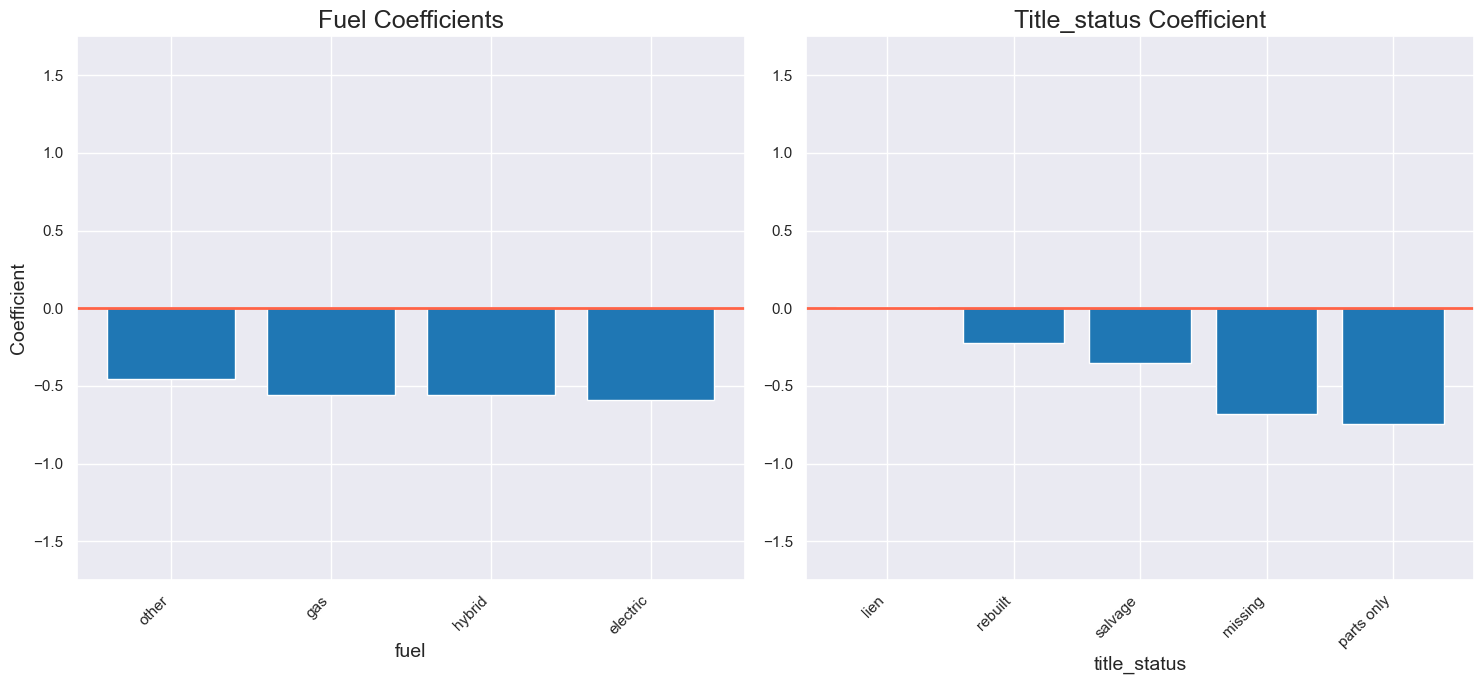

In [89]:
# Show only fuel coefficients:
mc = coef[coef.index.str.contains('fuel')].sort_values(by = 'Coefficient', ascending = False)
# remove the prefix manufacturer_ from mc index
mc.index = mc.index.str.replace('fuel_','')
plt.figure(figsize = (15, 7), tight_layout = True)
plt.subplot(1, 2, 1)
plt.bar(mc.index, mc.Coefficient, color = 'tab:blue')  
plt.ylim(-1.75, 1.75)
plt.xticks(rotation = 90)
plt.xlabel('fuel', fontsize = 14)
plt.ylabel('Coefficient', fontsize = 14)
plt.title('Fuel Coefficients', fontsize = 18)
plt.xticks(rotation = 45, ha = 'right')
plt.axhline(y = 0, lw = 2, color = 'tomato')
plt.grid(True)

mc = coef[coef.index.str.contains('title_status')].sort_values(by = 'Coefficient', ascending = False)
# remove the prefix manufacturer_ from mc index
mc.index = mc.index.str.replace('title_status_','')

plt.subplot(1, 2, 2)
plt.bar(mc.index, mc.Coefficient, color = 'tab:blue')  
plt.ylim(-1.75, 1.75)
plt.xticks(rotation = 90)
plt.xlabel('title_status', fontsize = 14)
plt.title('Title_status Coefficient', fontsize = 18)
plt.xticks(rotation = 45, ha = 'right')
plt.axhline(y = 0, lw = 2, color = 'tomato')
plt.grid(True);

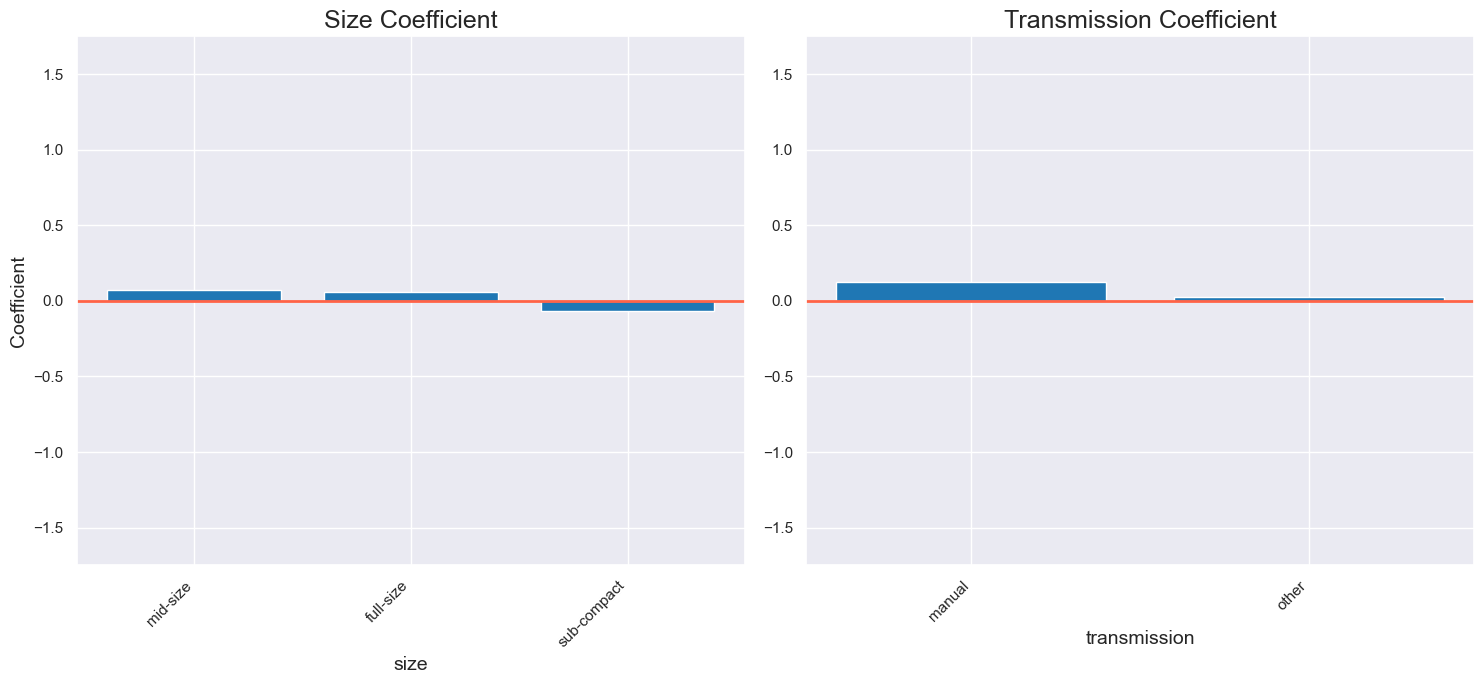

In [90]:
# Show only title_status coefficients:
mc = coef[coef.index.str.contains('size')].sort_values(by = 'Coefficient', ascending = False)
# remove the prefix manufacturer_ from mc index
mc.index = mc.index.str.replace('size_','')
plt.figure(figsize = (15, 7), tight_layout = True)
plt.subplot(1, 2, 1)
plt.bar(mc.index, mc.Coefficient, color = 'tab:blue')  
plt.ylim(-1.75, 1.75)
plt.xticks(rotation = 90)
plt.xlabel('size', fontsize = 14)
plt.ylabel('Coefficient', fontsize = 14)
plt.title('Size Coefficient', fontsize = 18)
plt.xticks(rotation = 45, ha = 'right')
plt.axhline(y = 0, lw = 2, color = 'tomato')
plt.grid(True);

# Show only transmission coefficients:
mc = coef[coef.index.str.contains('transmission')].sort_values(by = 'Coefficient', ascending = False)
# remove the prefix manufacturer_ from mc index
mc.index = mc.index.str.replace('transmission_','')
plt.subplot(1, 2, 2)
plt.bar(mc.index, mc.Coefficient, color = 'tab:blue')  
plt.ylim(-1.75, 1.75)
plt.xticks(rotation = 90)
plt.xlabel('transmission', fontsize = 14)
plt.title('Transmission Coefficient', fontsize = 18)
plt.xticks(rotation = 45, ha = 'right')
plt.axhline(y = 0, lw = 2, color = 'tomato')
plt.grid(True);

### Observation
1. Manufacturing brands and car types have the most impact on the price
2. States have very little impact on the price
3. Type, Coodition, fuel and title status all have impacts but much less than manufactured.
4. Size and transmission have very little impact

### Price Categories

Next, we look at the price categories and see if there is a relationship between the price and the other features.

In [92]:
# show price quantiles
df_clean['price'].quantile([0.25, 0.5, 0.75, 1.0])

0.25      8795.0
0.50     16994.0
0.75     28590.0
1.00    159991.0
Name: price, dtype: float64

In [93]:
# Catgeorize prices
df_analysis = df_clean.copy()
df_analysis['price_cat'] = pd.cut(df_analysis['price'], bins = [0, 16994.0,  28590.0, 159991.0], labels = ['low', 'med', 'high'])

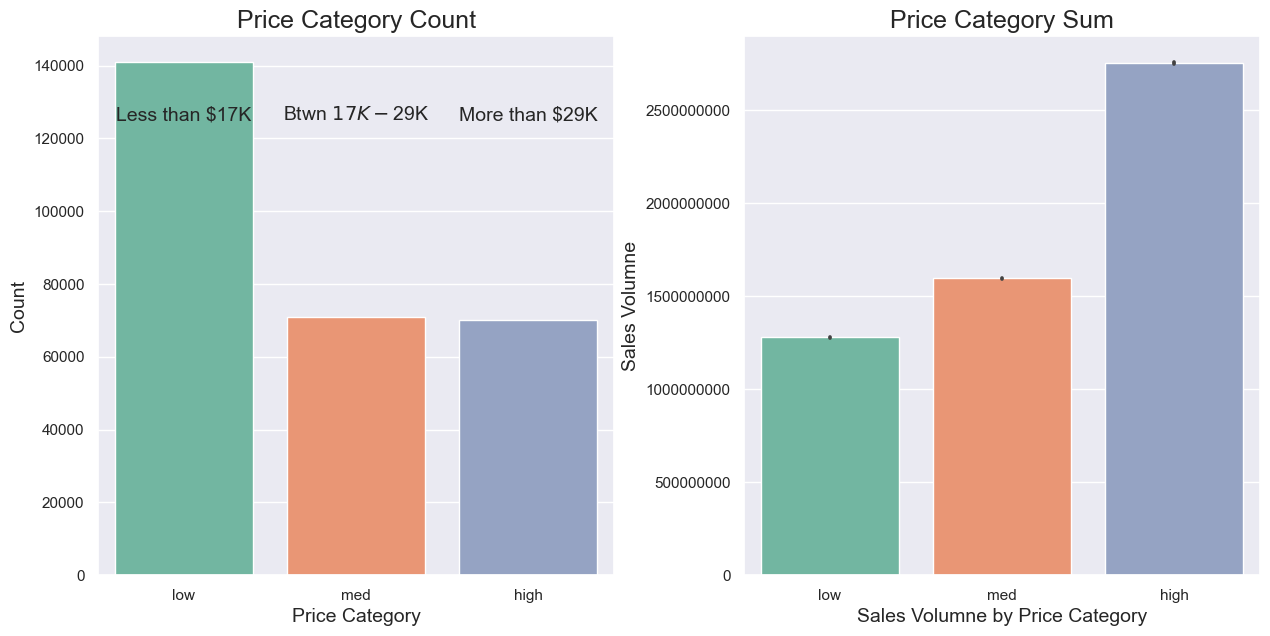

In [94]:
# Plot Price Categories
plt.figure(figsize = (15, 7))
plt.subplot(1, 2, 1)
sns.countplot(x = 'price_cat', data = df_analysis, palette = 'Set2')
plt.xlabel('Price Category', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.text(0, 125000, 'Less than $17K', ha = 'center', fontsize = 14)
plt.text(1, 125000, 'Btwn $17K - $29K', ha = 'center', fontsize = 14)
plt.text(2, 125000, 'More than $29K', ha = 'center', fontsize = 14)
plt.title('Price Category Count', fontsize = 18)
plt.subplots_adjust(wspace = 0.25)

# Plot sum of price by price_cat
plt.subplot(1, 2, 2)
sns.barplot(x = 'price_cat', y = 'price', data = df_analysis, palette = 'Set2', estimator = sum)
# show y axis in millions
plt.ticklabel_format(style = 'plain', axis = 'y')
plt.xlabel('Sales Volumne by Price Category', fontsize = 14)
plt.ylabel('Sales Volumne', fontsize = 14)
plt.title('Price Category Sum', fontsize = 18);

### Observation

Even thought there are much higher Low Priced used car sales, the total sales volumne is much higher for the high priced cars.

Next, we plot the odometer and year of the price categories

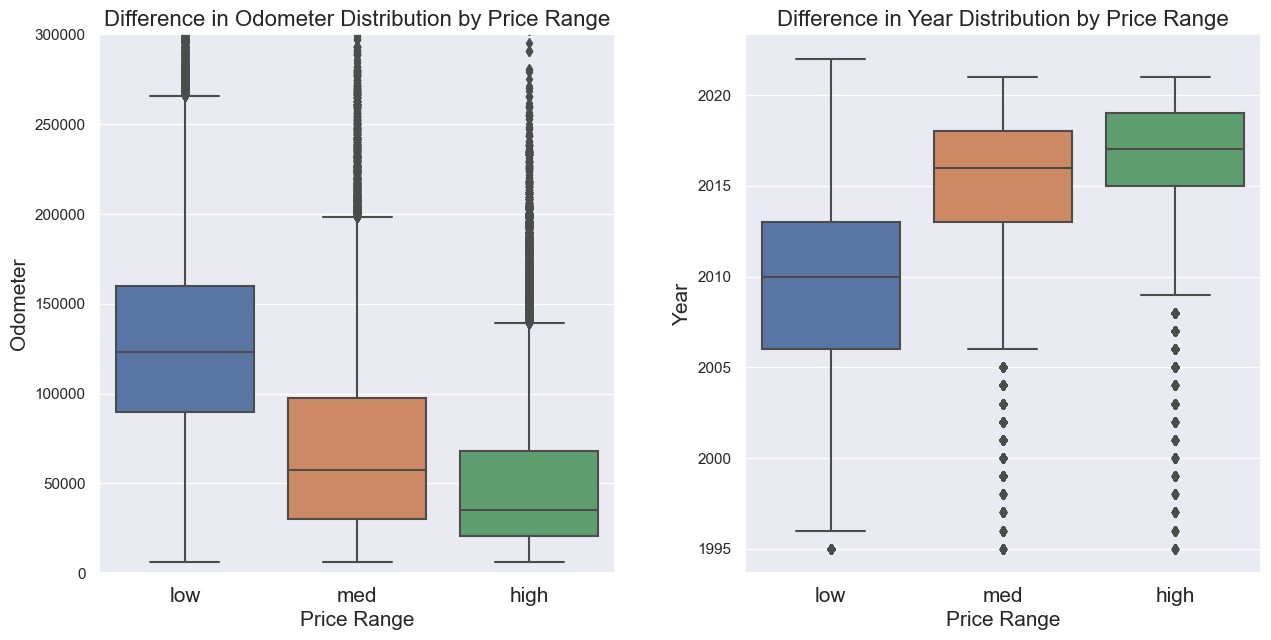

In [95]:
# Show only title_status coefficients:
plt.figure(figsize = (15, 7))
plt.subplot(1, 2, 1)
sns.boxplot(x = df_analysis.price_cat, y = df_analysis.odometer)
plt.title('Difference in Odometer Distribution by Price Range', fontsize = 16)
plt.xlabel('Price Range', fontsize = 15)
plt.xticks(fontsize = 15)
plt.ylabel('Odometer', fontsize = 15)
plt.ylim(0, 300000)
plt.subplots_adjust(wspace = 0.25)

# Show only transmission coefficients:
plt.subplot(1, 2, 2)
sns.boxplot(x = df_analysis.price_cat, y = df_analysis.year)
plt.title('Difference in Year Distribution by Price Range', fontsize = 16)
plt.xlabel('Price Range', fontsize = 15)
plt.xticks(fontsize = 15)
plt.ylabel('Year', fontsize = 15);

#### Odometer vs Price
1. _Low Price_ cars tend to have Odometer between 90 to 170K
2. _Med Price_ cars tend to have Odometer between 40 to 100K
3. _High Price_ cars tend to have Odometer less than 70K

#### Year vs Price
1. _Low Price_ cars tend to have built between 2006 to 2013
2. _Med Price_ cars tend to have built between 2014 to 2017
3. _High Price_ cars tend to have built between 2015 to 2019

#### Sales Volumne by Type Analysis

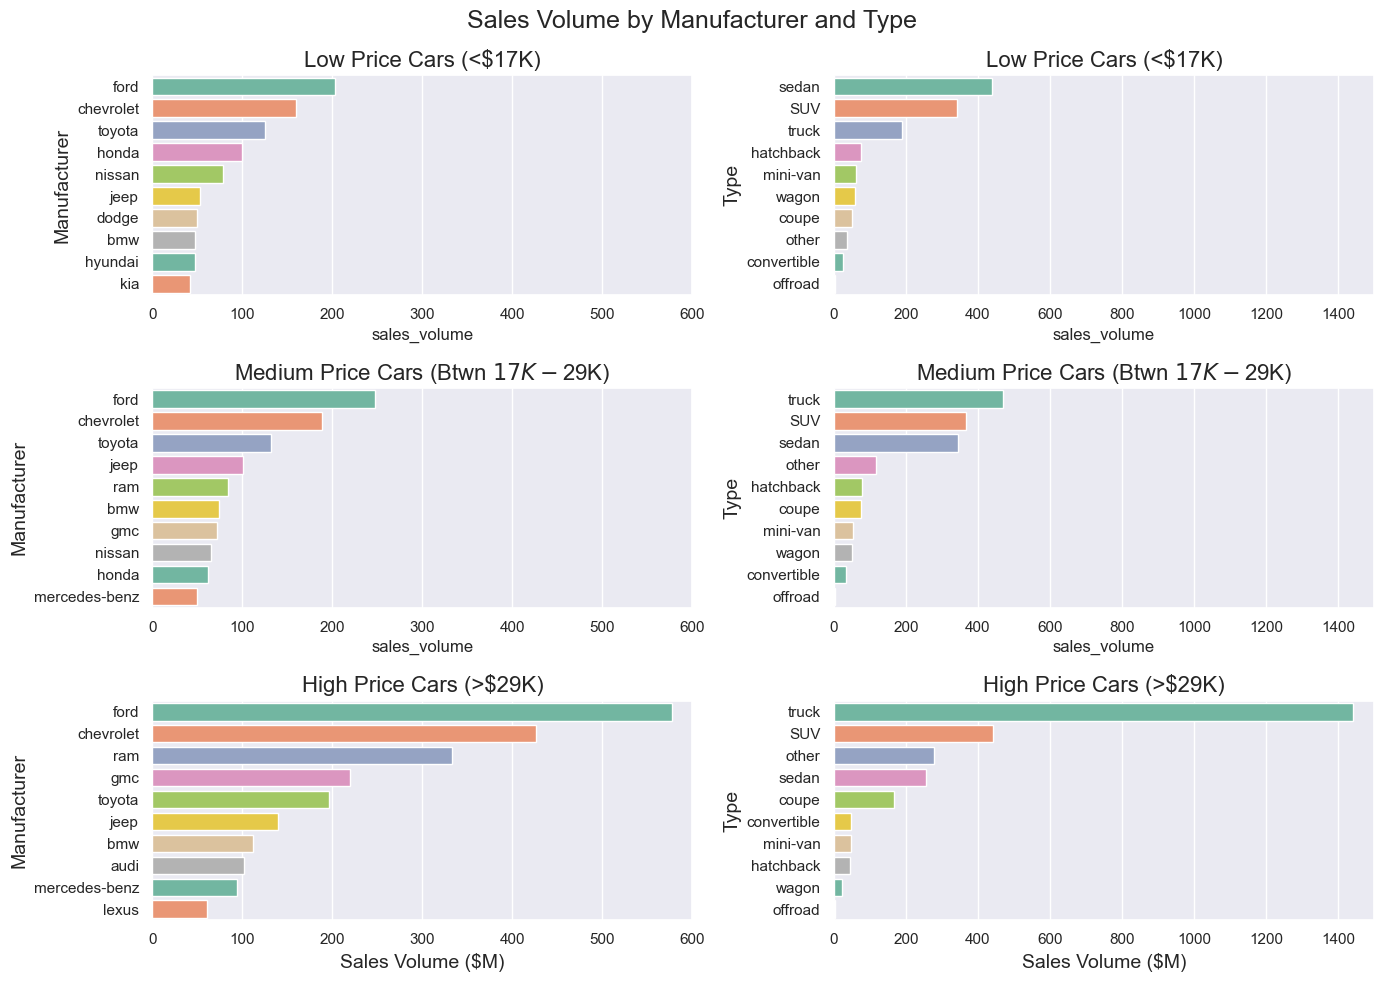

In [97]:
# Parce data int low, med, high price categories
low_price = df_analysis[df_analysis['price_cat'] == 'low']
med_price = df_analysis[df_analysis['price_cat'] == 'med']
high_price = df_analysis[df_analysis['price_cat'] == 'high']

# Show all six plots together
low_price_manu = pd.DataFrame((low_price.groupby('manufacturer')['price'].sum()))/1000000
low_price_manu.reset_index(inplace = True)
low_price_manu.columns = ['manufacturer', 'sales_volume']
low_price_manu.sort_values(by = 'sales_volume', ascending = False, inplace = True)

low_price_type = pd.DataFrame((low_price.groupby('type')['price'].sum()))/1000000
low_price_type.reset_index(inplace = True)
low_price_type.columns = ['type', 'sales_volume']
low_price_type.sort_values(by = 'sales_volume', ascending = False, inplace = True)

med_price_manu = pd.DataFrame((med_price.groupby('manufacturer')['price'].sum()))/1000000
med_price_manu.reset_index(inplace = True)
med_price_manu.columns = ['manufacturer', 'sales_volume']
med_price_manu.sort_values(by = 'sales_volume', ascending = False, inplace = True)

med_price_type = pd.DataFrame((med_price.groupby('type')['price'].sum()))/1000000
med_price_type.reset_index(inplace = True)
med_price_type.columns = ['type', 'sales_volume']
med_price_type.sort_values(by = 'sales_volume', ascending = False, inplace = True)

high_price_manu = pd.DataFrame((high_price.groupby('manufacturer')['price'].sum()))/1000000
high_price_manu.reset_index(inplace = True)
high_price_manu.columns = ['manufacturer', 'sales_volume']
high_price_manu.sort_values(by = 'sales_volume', ascending = False, inplace = True)

high_price_type = pd.DataFrame((high_price.groupby('type')['price'].sum()))/1000000
high_price_type.reset_index(inplace = True)
high_price_type.columns = ['type', 'sales_volume']
high_price_type.sort_values(by = 'sales_volume', ascending = False, inplace = True)

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize = (14, 10), tight_layout = True)
#Show a header to top row of plots
fig.suptitle('Sales Volume by Manufacturer and Type', fontsize = 18)
# plot low price cars by sales volume for top 10 manufacturers
sns.barplot(x = 'sales_volume', y = 'manufacturer', data = low_price_manu.sort_values(by = 'sales_volume', ascending = False).head(10), palette = 'Set2', ax = ax1)
ax1.set_title('Low Price Cars (<$17K)', fontsize = 16)
ax1.set_ylabel('Manufacturer', fontsize = 14)
ax1.set_xlim(0, 600)

sns.barplot(x = 'sales_volume', y = 'type', data = low_price_type.sort_values(by = 'sales_volume', ascending = False).head(10), palette = 'Set2', ax = ax2)
ax2.set_ylabel('Type', fontsize = 14)
ax2.set_title('Low Price Cars (<$17K)', fontsize = 16)
ax2.set_xlim(0, 1500)

# plot med price cars by sales volume for top 10 manufacturers
sns.barplot(x = 'sales_volume', y = 'manufacturer', data = med_price_manu.sort_values(by = 'sales_volume', ascending = False).head(10), palette = 'Set2', ax = ax3)
ax3.set_title('Medium Price Cars (Btwn $17K-$29K)', fontsize = 16)
ax3.set_ylabel('Manufacturer', fontsize = 14)
ax3.set_xlim(0, 600)

sns.barplot(x = 'sales_volume', y = 'type', data = med_price_type.sort_values(by = 'sales_volume', ascending = False).head(10), palette = 'Set2', ax = ax4)
ax4.set_title('Medium Price Cars (Btwn $17K-$29K)', fontsize = 16)
ax4.set_ylabel('Type', fontsize = 14)
ax4.set_xlim(0, 1500)

# plot high price cars by sales volume for top 10 manufacturers
sns.barplot(x = 'sales_volume', y = 'manufacturer', data = high_price_manu.sort_values(by = 'sales_volume', ascending = False).head(10), palette = 'Set2', ax = ax5)
ax5.set_title('High Price Cars (>$29K)', fontsize = 16)
ax5.set_xlabel('Sales Volume ($M)', fontsize = 14)
ax5.set_ylabel('Manufacturer', fontsize = 14)
ax5.set_xlim(0, 600)

sns.barplot(x = 'sales_volume', y = 'type', data = high_price_type.sort_values(by = 'sales_volume', ascending = False).head(10), palette = 'Set2', ax = ax6)
ax6.set_title('High Price Cars (>$29K)', fontsize = 16)
ax6.set_xlabel('Sales Volume ($M)', fontsize = 14)
ax6.set_ylabel('Type', fontsize = 14)
ax6.set_xlim(0, 1500);

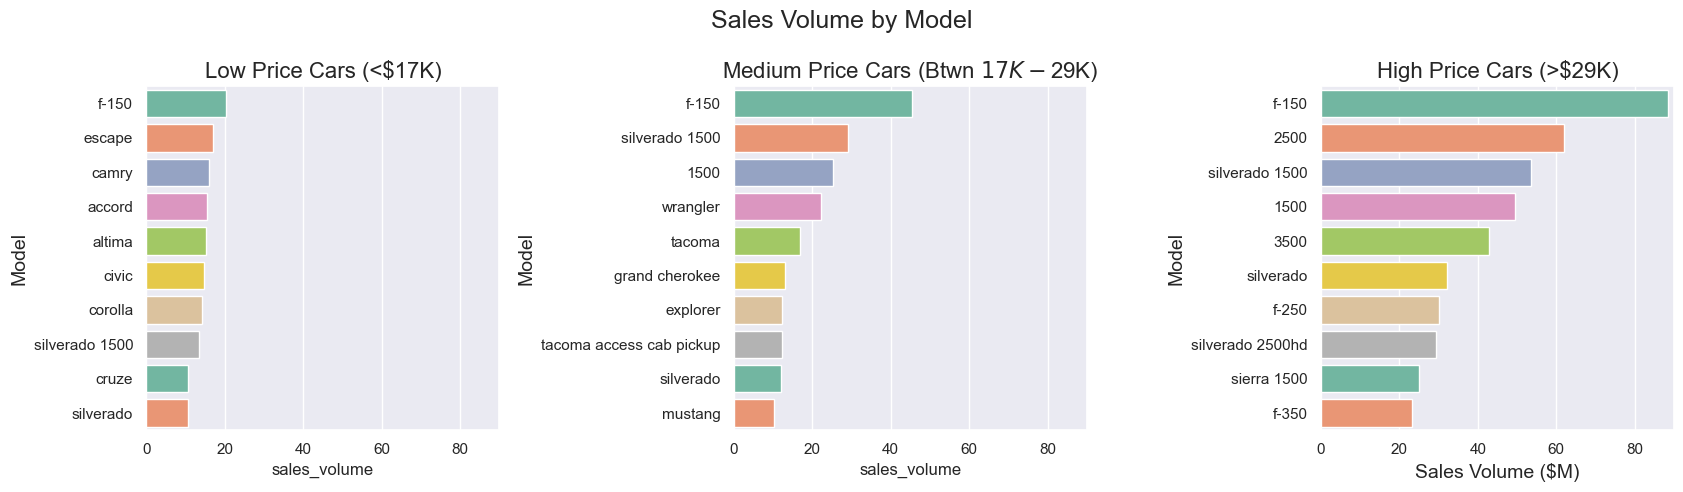

In [98]:
# Find top 10 models for each price range
low_price_model = pd.DataFrame((low_price.groupby('model')['price'].sum()))/1000000
low_price_model.reset_index(inplace = True)
low_price_model.columns = ['model', 'sales_volume']
low_price_model.sort_values(by = 'sales_volume', ascending = False, inplace = True)

med_price_model = pd.DataFrame((med_price.groupby('model')['price'].sum()))/1000000
med_price_model.reset_index(inplace = True)
med_price_model.columns = ['model', 'sales_volume']
med_price_model.sort_values(by = 'sales_volume', ascending = False, inplace = True)

high_price_model = pd.DataFrame((high_price.groupby('model')['price'].sum()))/1000000
high_price_model.reset_index(inplace = True)
high_price_model.columns = ['model', 'sales_volume']
high_price_model.sort_values(by = 'sales_volume', ascending = False, inplace = True)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (17, 5), tight_layout = True)
#Show a header to top row of plots
fig.suptitle('Sales Volume by Model', fontsize = 18)
# plot low price cars by sales volume for top 10 models
sns.barplot(x = 'sales_volume', y = 'model', data = low_price_model.sort_values(by = 'sales_volume', ascending = False).head(10), palette = 'Set2', ax = ax1)
ax1.set_title('Low Price Cars (<$17K)', fontsize = 16)
ax1.set_ylabel('Model', fontsize = 14)
ax1.set_xlim(0, 90)

# plot med price cars by sales volume for top 10 models
sns.barplot(x = 'sales_volume', y = 'model', data = med_price_model.sort_values(by = 'sales_volume', ascending = False).head(10), palette = 'Set2', ax = ax2)
ax2.set_title('Medium Price Cars (Btwn $17K-$29K)', fontsize = 16)
ax2.set_ylabel('Model', fontsize = 14)
ax2.set_xlim(0, 90)

# plot high price cars by sales volume for top 10 models
sns.barplot(x = 'sales_volume', y = 'model', data = high_price_model.sort_values(by = 'sales_volume', ascending = False).head(10), palette = 'Set2', ax = ax3)
ax3.set_title('High Price Cars (>$29K)', fontsize = 16)
ax3.set_xlabel('Sales Volume ($M)', fontsize = 14)
ax3.set_ylabel('Model', fontsize = 14)
ax3.set_xlim(0, 90);


### Observations:
**Low Price Cars**:  
- Mostly sedan, SUV, and truck built between 2000 to 2010 with odometer between 100,000 to 200,000 miles and manufactured by Ford, Chevrolet, Toyota, Honda, and Nissan
- Best Selling Models:  Ford F-150, Ford Escape, Toyota Camery, Honda Accord, Nissan Ultima, ... 

**Medium Price Cars**:  
- Mostly trucks, sedans, SUVs built between 2014 to 2017 with odometer less than 70K miles and manufactured by Ford, Chevrolet, ram, gmc, and Toyota
- Best Selling Models: Ford F-150, Chevrolet Siverado, Jeep Wrangler, Toyota Tacoma, Jeep Gran Cherokee

**High Price Cars**:  
- Mostly trucks, SUVs built between 2015 to 2019 with odometer between 40 to 100K miles and manufactured by Ford, Chevrolet, Toyota, Jeep, and Ram
- Best Selling Models: Ford F-150, Chevrolet Siverado (all models), Ford F-250, Ford F-350

### Next steps and recommendations:

We examined the used car sales data to develop a model that can predict the used car prices and determine the impact of various independent features on the used car prices.  Based on my analysis I can provide the following recomendations to a used car dealership:

1.  We developed a robust Linear Regression model that can accurately predict the car prices between $15K to $90K price range
2.  Certain car brands can fetch higher prices (Ferrari, Tesla, Persche, Lexuss, ...) vs brands that fetch lower process (fiat, mercury, saturn, mitsubishi, ...)
3.  Trucks and SUVs are more popular in the mid to high price categories.  Sedans are more popular in the low price category
4.  Trucks from Ford and Chevrolet are sold the most and should be a big part of your inventory
5.  In general, cars in high price categories generate much higher sales volumes
6.  Further clean up of the missing or mistyped Type and Model data could provide a larger dataset and allows predictions against specific mode
